*TITANIC ANALYSIS INDEX*
===

- [0.History](#0.History)
- [1.Column Description](#1.Column-Description)
- [2.Encoding](#2.Encoding)
    - [2.1 Sex](#2.1-Sex)
    - [2.2 Embarked](#2.2-Sex)
- [3.Correlations](#3.Correlations)
    - [3.1 Pearson](#3.1-Pearson)
    - [3.2 Kendall](#3.2-Kendall)
    - [3.3 Spearman](#3.3-Spearman)
    - [3.4 Detailed Correlation](#3.4-Detailed-Correlation)

NOTE CONFOUNDING VARIABLES
- un fattore che può aver inciso è il titolo di studio perchè può essere un indice di consapevolezza
- l'etnia dei passeggeri può avere in qualche modo influito sulla consapevolezza?
- la posizione all'interno della nave soprattutto per la 3° classe può aver influito perchè i percorsi di risalita per il raggiungimento del livello delle barche di salvataggio era complicato
- sailing crew and non sailing crew?
- numero scialuppe per classe?
- il numero di componenti della famiglia influisce sulla cabina?
- il costo del biglietto influisce sulla cabina?
- distribuzione famiglie numerose per classe

0.History
===


But by far the largest group of passengers was in Third Class: more than 700, exceeding the other two levels combined. Some had paid less than 20 to make the crossing.

In compliance with the law of the sea, women and children boarded the boats first.Yet many of the victims were in fact women and children.

Gaining a bit more understanding of the problem context can provide several clues about the importance of variables, and help us make more sense of some of the relations that will be uncovered during our exploratory data analysis. So it's worth spending some time learning about what happened the night the Titanic sank (we can think of this as gaining some domain expertise). There are countless books, documentaries, and webpages dedicated to this subject. Here we highlight a few interesting facts:

<ul>   
    <li>The Titanic's officers issued a "women and children first" order for evacuating passengers via lifeboats. However, there was no organized evacuation plan in place.</li>
    <li>There was in fact no general "abandon ship" order given by the captain, no public address system, and no lifeboat drill. Many passengers did not realize they were in any imminent danger, and some had to be goaded out of their cabins by members of the crew or staff.</li>
    <li>Lifeboats were segregated into different class sections, and there were more 1st-class passenger lifeboats than for the other two classes.The lifeboats were launched from the First Class decks first and the Second Class decks second. There were no decks or lifeboats dedicated to the Third Class ??????</li>
    <li>First Class suites, berths, and social rooms were located principly on the center of the ship on decks A, B, and C (or more poetically the Boat Deck, Promenade Deck and Bridge Deck), with additional cabins on decks D and E. They had either immediate or easy access to the Boat Deck where all of the lifeboats were housed. Lifeboats numbered 1 through 8, which were the first to be launched, were located in the fore of the ship, the First Class Deck. The numbers indicate that First Class Passengers utilized any lifeboat available without compunction.</li>
    <li>Second Class rooms were mostly located on decks D and E, with some on lower decks F and G. Where Second Class passengers were on the same deck as First Class passengers, the Second Class passengers were further aft. Some Second Class passengers would have had easy access through a stairway to the stern of the Boat Deck (Second Class Deck) where lifeboats numbered 9 through 16 were located. More by cultural than physcial barriers, the Second Class passengers would have been prohibited from entering the First Class section of the Boat Deck.</li>
    <li>By law, passed for public health reasons, gates separating steerage passengers from the other passengers had to be locked. Back then steerage passengers were equated with emigrants who were equated with disease and pestilence, and it was thought important to give passengers in more luxurious accommodations peace of mind that the ship would not breed contagion or other hazards to their well-being. The locked gates proved to be the most deadly, but there were other measures used on steerage passengers alone. Before boarding, steerage passengers had to submit to a health inspection, for at least obvious signs of infection, lice, or disease.As a public health measure, the public toilets in steerage had an automatic flushing feature.</li>
    <li>We know it was more difficult for 3rd class passengers to access lifeboats, because the 3rd-class passenger sections were gated off from the 1st and 2nd-class areas of the ship. This was actually due to US immigration laws, which required immigrants (primarily 3rd-class) to be segregated and processed separately from other passengers upon arrival to the US. As a consequence, 3rd-class passengers had to navigate through a maze of staircases and corridors to reach the lifeboat deck.</li>
</ul>
Given these facts, we can already surmize that Sex, Pclass, and Age are likely to be the most important features. We will see what trends our Exploratory Data Analysis reveals.

Conerning the Fare feature: Fare is given in Pounds Sterling. There were really no 'standard' fares - many factors influenced the price charged, including the cabin size and number of people sharing a cabin, whether it was on the perimeter of the ship (i.e. with a porthole) or further inside, the qualities of the furnishings and provisions, etc. Children travelled at reduced rates, as did servants with 1st-class tickets. There seemed also to have been some family discount rates given, but we lack detailed information on how this was calculated. However, our research does tell us that:

Ticket price (Fare) was cumulative, and included the cost for all passengers sharing that ticket.

A Quick Glance at the Sorted CSV File
Several useful observations can be made by quickly glancing at the CSV file containing the combined training and test data, and sorting some of the entries. Don't underestimate the usefulness of this rather rudimentary step!

Findings:

<ul>   
    <li>Sort by Passenger Name: Passengers with matching surnames tend to also have matching entries for several other features: Pclass, Ticket, Fare, and Embarked (in addition to Cabin when available). This tells us we can use matching Ticket and Fare information as a basis for grouping families. If we sort by ticket, we can use surnames to distinguish between 'family' groups and non-related co-travellers. </li>
    <li>Sort by Age: All entries with the title 'Master' in the name correspond to males under the age of 15. This can be useful in helping us impute missing age data.</li>
    <li>Sort by Cabin: We find that Cabin number is available for most passengers with PClass=1, but generally missing for passengers of Pclass=2 or 3.</li>
    <li>Sort by Ticket Names: (I.Tickets not containing letters.) Tickets with 4-digits correspond to Pclass 2 or 3; the vast majority of 5-digit tickets correspond to Pclass 1 or 2; for 6-digit and 7-digit tickets, the leading number matches the Pclass. (II. Tickets including letters.) Tickets beginning with A/4 correspond to passengers with embarked=S and PClass=3. Tickets beginning with C.A. or CA also correspond to embarked=S, with PClass of 2 or 3. All tickets beginning with PC correspond to PClass=1. These patterns might be useful for helping us spot inconsistencies in the data.</li>
</ul>  

1.Column Description
===

<ul>   
    <li><b>pclass</b>: A proxy for socio-economic status (SES)</li>
        <ul>
          <li>1st = Upper</li>
          <li>2nd = Middle</li>
          <li>3rd = Lower</li>
        </ul>
    <li><b>age</b>: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5</li>
    <li><b>sibsp</b>: is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler.</li>
    <li><b>parch</b>: Similar to the SibSp, this feature contained the number of parents or children each passenger was touring with.</li>
    <li><b>ticket</b>:	Ticket number	</li>
    <li><b>fare</b>:	Passenger fare o tariffa</li> 
    <li><b>cabin</b>:	Cabin number	</li>
    <li><b>embarked</b>:	Port of Embarkation. Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import warnings
#import plotly.express as px

from sklearn import preprocessing
#from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#from xgboost import XGBClassifier
import warnings
import os
#import plotly.express as px
#from plotly.subplots import make_subplots
#import plotly.figure_factory as ff
#import plotly.offline as offline
#import plotly.graph_objs as go

test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
df_data = pd.concat([train, test], sort=True).reset_index(drop=True)
df_data_train = train.copy()
df_data_1 =df_data.copy()


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
df_data.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
df_data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

2.Encoding
===

Since the string data does not go well with the machine learning algorithms, I needed to convert the non-numeric data to numeric data. I used LabelEncoder to encode the ‘Sex’ column. The label encoder would substitute ‘male’ values with some number and ‘female’ values with some different number.
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])
For the other categorical data, I used Pandas’ dummies. It adds columns corresponding to all the possible values. So, if there could be three embarkment values — Q, C, S, the get_dummies method would create three different columns and assign values 0 or 1 depending on the embarking point.

2.1 Sex
---

Utilizziamo come convenzione male = 0 e female = 1

In [6]:
df_data_1['Sex'] = df_data_1['Sex'].replace(['male'], '0')
df_data_1['Sex'] = df_data_1['Sex'].replace(['female'], '1')
df_data_1['Sex'] = df_data_1['Sex'].astype("int64")
df_data_train['Sex'] = df_data_train['Sex'].replace(['male'], '0')
df_data_train['Sex'] = df_data_train['Sex'].replace(['female'], '1')
df_data_train['Sex'] = df_data_train['Sex'].astype("int64")

In [7]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   int64  
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [8]:
df_data_1.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket  
0       3    0      1       0.0         A/5 21171  
1       1    1      1       1.0          PC 17599  
2       3    1      0       1.0  STON/O2. 3101282  
3       1    1      1       1.0            113803  
4       3    0      0       0.0            373450

2.2 Embarked
---

In [9]:
df_data_1['Embarked'] = df_data_1['Embarked'].replace(['C'], '0')
df_data_1['Embarked'] = df_data_1['Embarked'].replace(['Q'], '1')
df_data_1['Embarked'] = df_data_1['Embarked'].replace(['S'], '2')
#Devo usare il float perchè la conversione da float NaN a int dà errore
df_data_1['Embarked'] = df_data_1['Embarked'].astype("float64")
df_data_1['UnknownCabin']=df_data_train['Cabin'].isnull().apply(lambda x: 1 if x is True else 0)
df_data_train['Embarked'] = df_data_train['Embarked'].replace(['C'], '0')
df_data_train['Embarked'] = df_data_train['Embarked'].replace(['Q'], '1')
df_data_train['Embarked'] = df_data_train['Embarked'].replace(['S'], '2')
#Devo usare il float perchè la conversione da float NaN a int dà errore
df_data_train['Embarked'] = df_data_train['Embarked'].astype("float64") 

In [10]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1046 non-null   float64
 1   Cabin         295 non-null    object 
 2   Embarked      1307 non-null   float64
 3   Fare          1308 non-null   float64
 4   Name          1309 non-null   object 
 5   Parch         1309 non-null   int64  
 6   PassengerId   1309 non-null   int64  
 7   Pclass        1309 non-null   int64  
 8   Sex           1309 non-null   int64  
 9   SibSp         1309 non-null   int64  
 10  Survived      891 non-null    float64
 11  Ticket        1309 non-null   object 
 12  UnknownCabin  891 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 133.1+ KB


3.Correlations
===

3.1 Pearson
---

La correlazione di Pearson è utilizzabile con due assunzioni:
<ul>
   <li>la distribuzione dei dati è gaussiana</li>
    <li>la rappresentazione cartesiana è <b>lineare</b></li>
</ul> 
Quindi il primo punto debole di questa correlazione è che un legame non lineare viene interpretato come correlazione 0!
E' il tipo di correlazione più semplice e basato sulla relazione: 


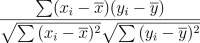

Dalla matrice di correlazione costruita si notano le seguenti dipendenze in ordine d'importanza:
<ul>
    <li> PClass e Fare : 0.56</li>
    <li> Sex e Survived : 0.54</li>
    <li> PClass e Age : 0.41</li>
    <li> PClass e Survived : 0.34</li>
    <li> Parch e SibSp : 0.37</li>
</ul> 

<AxesSubplot:>

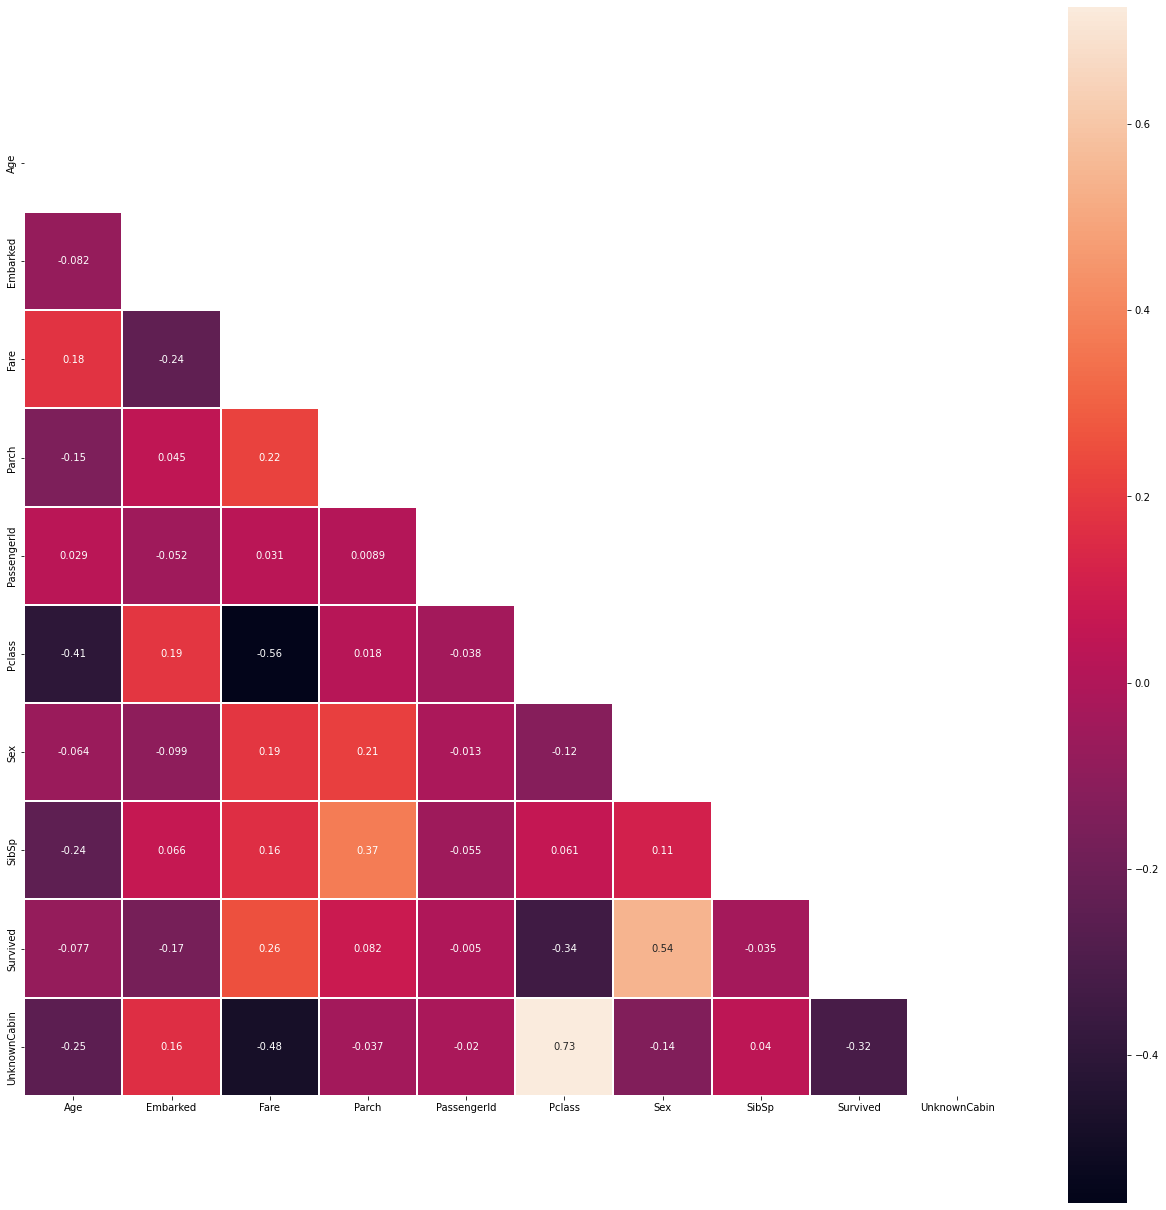

In [11]:
df_heatmap = pd.DataFrame(df_data_1.corr(method='pearson'))
mask=np.zeros_like(df_heatmap)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(22,22),facecolor='white')
sns.color_palette("rocket", as_cmap=True)  
sns.heatmap(df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket',mask=mask)

3.2 Kendall
---

La correlazione di Kendall invece segue un approccio diverso
 
<ol>
  <li>Ranking: si ordinano i dati secondo la variabile indipendente</li>
  <li>Primo Compare: si confronta la prima variabile indipendente in cima alla tabella ordinata con tutti gli altri sample indipendenti x<sub>i+1</sub> > x<sub>i</sub> </li>
  <li>Secondo Compare: si confronta la prima variabile dipendente associata alla prima variabile indip. con la successiva variabile dipendente verificando se y<sub>i+1</sub> > y<sub>i</sub> </li>
  <li>Concorde o Discorde: se x<sub>i+1</sub> > x<sub>i</sub> e y<sub>i+1</sub> > y<sub>i</sub> sono entrambe vere si incrementa un valore <b>Nc</b> (numero di check concordi)   altrimenti s'incrementa <b>Nd</b> (numero di check discordi) </li> 
  <li>Si eseguono i passi 2 e 3 scorrendo la tabella verso il basso, fissando ogni volta una coppia di variabili dip. e indip. e confrontandole con tutte le altre</li> 
</ol>     

Questo tipo di correlazione è perciò un po' più grossolana perchè non dà una percezione profonda della curva che stiamo analizzando ma il vantaggio è che la relazione potrebbe anche essere<b> non lineare</b>

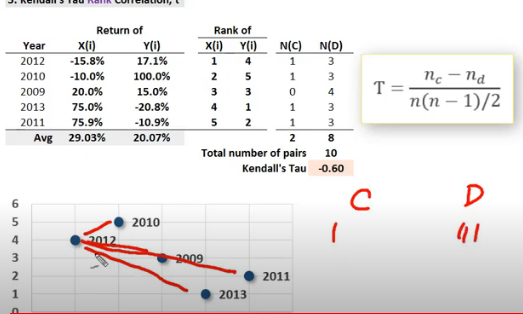

Dalla matrice di correlazione costruita si notano le seguenti dipendenze in ordine d'importanza:
<ul>
    <li> PClass e Fare : 0.85</li>
    <li> PClass e Survived : 0.71</li>
    <li> Age e Parch : 0.68</li>       
    <li> Age e PClass : 0.61</li> 
    <li> Age e SibSp : 0.57</li>
    <li> Age e Survived : 0.55</li>
</ul> 

<AxesSubplot:>

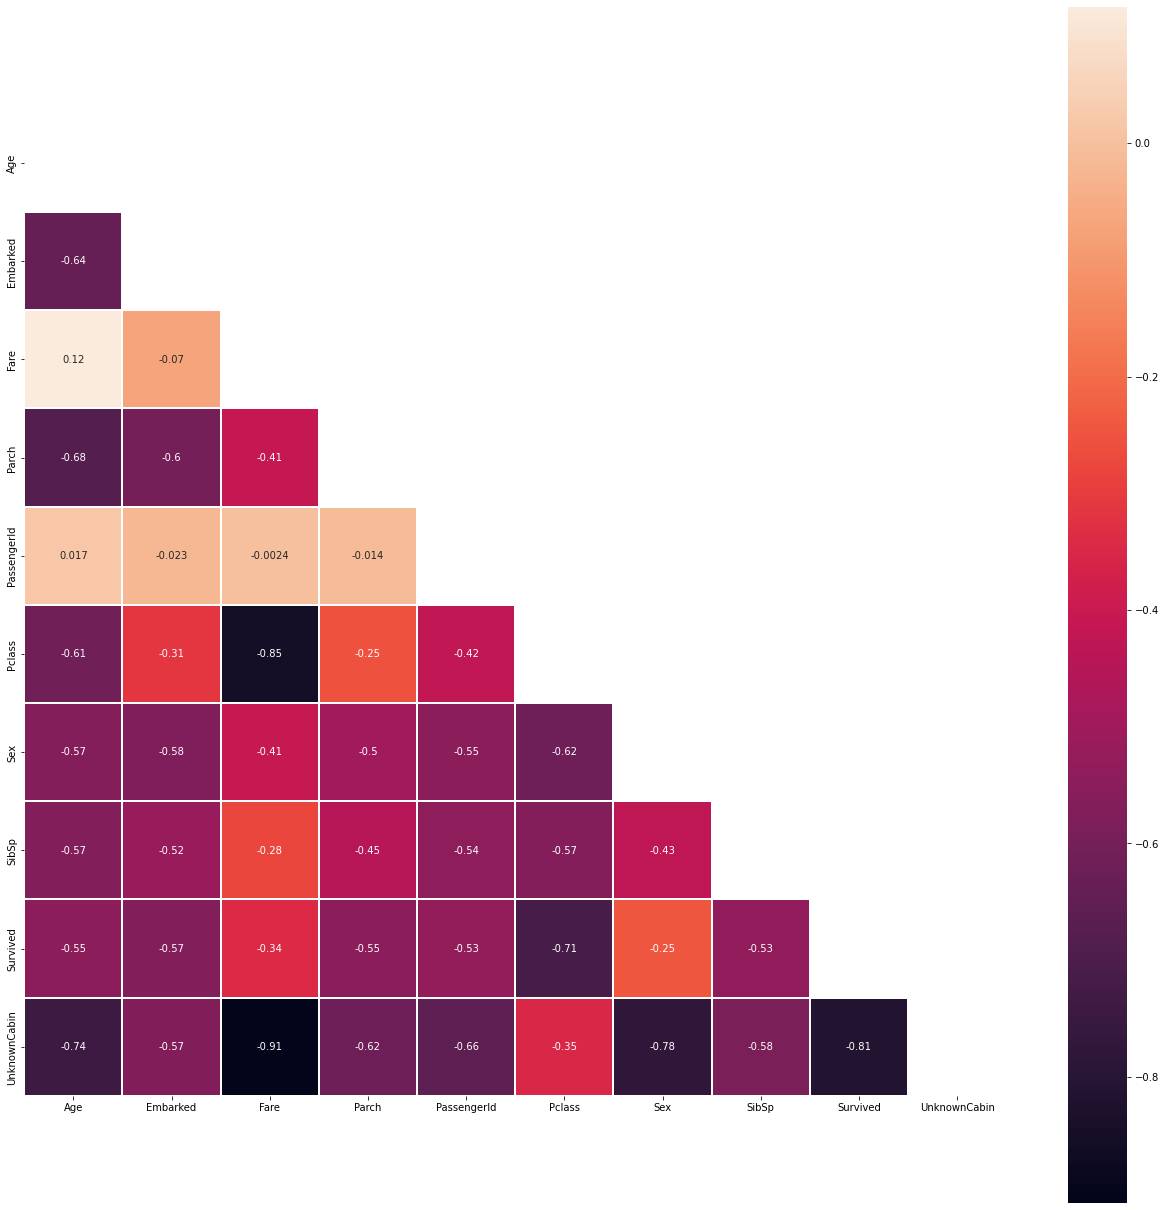

In [12]:
df_heatmap = pd.DataFrame(df_data_1.corr(method='kendall'))
mask=np.zeros_like(df_heatmap)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(22,22),facecolor='white')
sns.color_palette("rocket", as_cmap=True)  
sns.heatmap(df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket',mask=mask)

3.3 Spearman
---

La correlazione di Spearman è simile a quella di Pearson con la differenza che il sample da confrontare viene ordinato. Successivamente si calcola la distanza tra due set di campioni per mezzo di una semplice differenza portata poi al quadrato. La correlazione di Spearman è molto più sensibile alle variazioni dei dati rispetto alla correlazione di Kendall. Sotto un esempio:

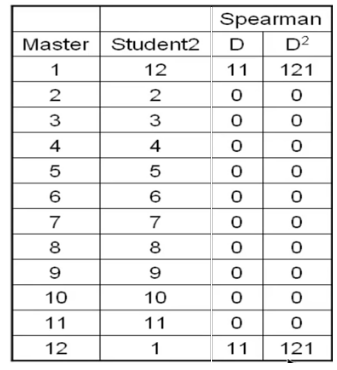

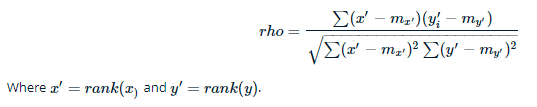

Dalla matrice di correlazione costruita si notano le seguenti dipendenze in ordine d'importanza:
<ul>
    <li> PClass e Fare : 0.71</li>
    <li> PClass e Fare : 0.54</li>
    <li> SibSp e Fare : 0.45</li>
    <li> SibSp e Parch : 0.44</li>       
    <li> Age e PClass : 0.4</li> 

</ul> 

<AxesSubplot:>

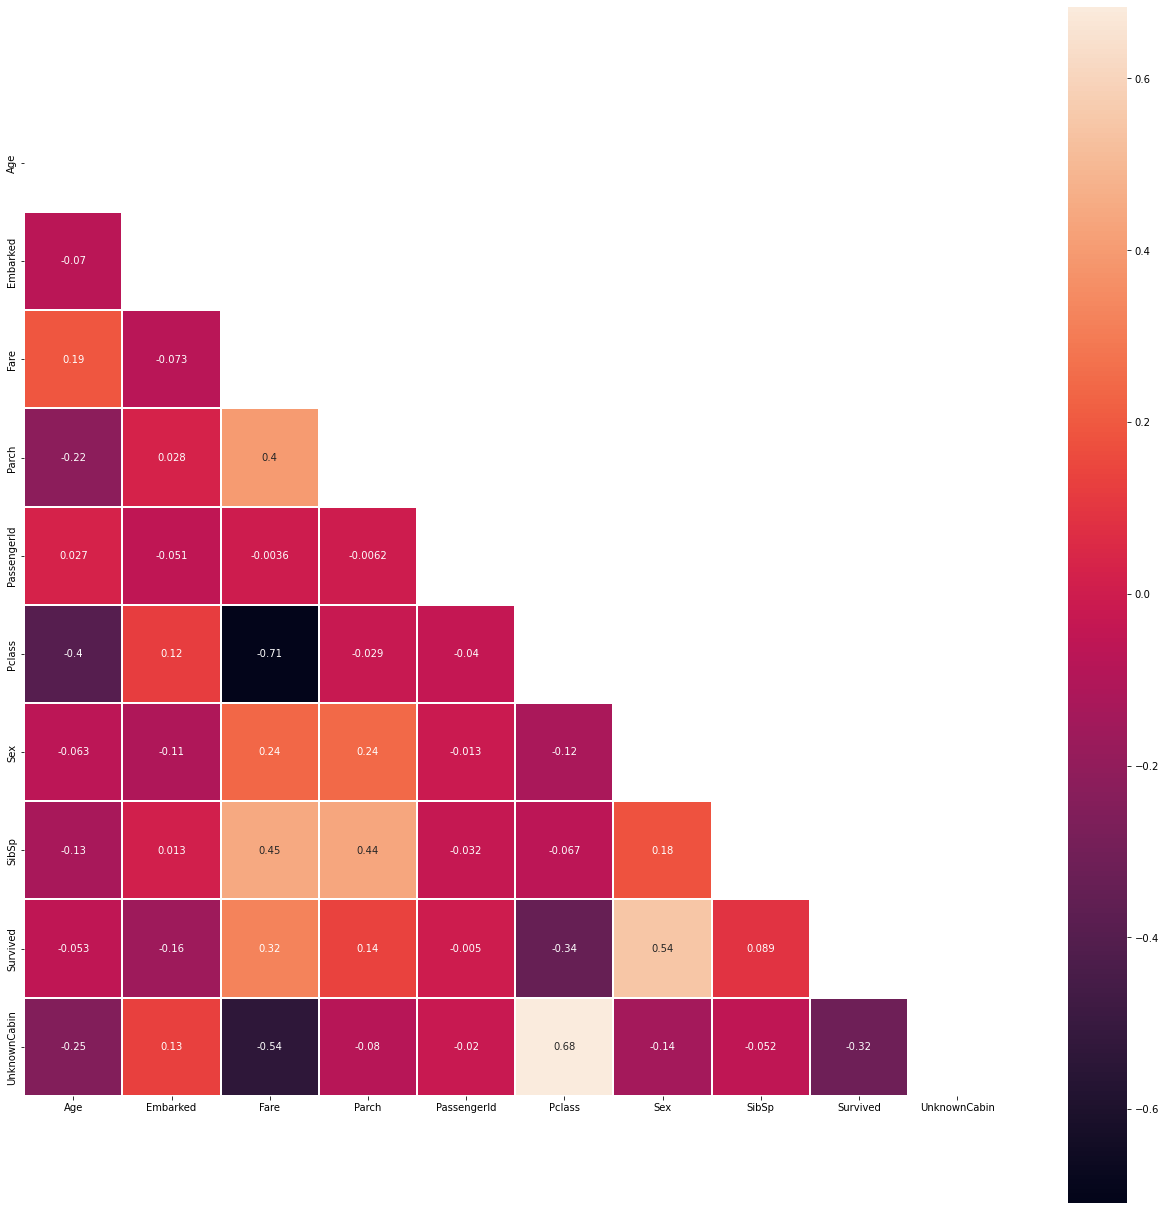

In [13]:
df_heatmap = pd.DataFrame(df_data_1.corr(method='spearman'))
mask=np.zeros_like(df_heatmap)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(22,22),facecolor='white')
sns.color_palette("rocket", as_cmap=True)  
sns.heatmap(df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket',mask=mask)

4.Data imputation
===

Innanzi tutto verifico se ci sono dei campi vuoti nella tabella

In [14]:
cols_with_missing = [col for col in df_data_1.columns if df_data_1[col].isnull().any()] 
pd.isnull(df_data_1[cols_with_missing]).sum()

Age              263
Cabin           1014
Embarked           2
Fare               1
Survived         418
UnknownCabin     418
dtype: int64

E' necessario sostituire i campi vuoti con dei valori che abbiano un senso logico.

4.1 Age Missing Values
---

E' interessante verificare come è distrubita l'età in funzione delle classi. Per fare questo usiamo dei grafici molto interessanti, chiamati <b>violin plot</b> perchè somigliano nella forma proprio a dei violini.
Questi grafici sono molto interessanti perchè racchiudono parecchie informazioni:
<ul>
    <li><b>Distribuzione</b>:queste forme non vi ricordano qualcosa? Ma guarda un po' delle <b>gaussiane</b> o anche denominate curve a campana! Bisogna farci un po' l'occhio perchè le curve vengono specchiate (non so per quale motivo perchè basterebbe guardarne metà)</li>
    <li><b>Media</b>:a occhio possiamo già vedere che per le Classi meno abbienti 2 e 3, la media d'età è piuttosto bassa che può essere ragionevole</li>
    <li><b>Deviazione standard</b> : anche questo parametro importantissimo si nota ad occhio quanto sia differente nelle tre curve. Nella Classe 1 la deviazione è più ampia cioè l'intervallo d'età è più distribuito. Nelle Classi 2 e 3 invece la deviazione è più ridotta quindi il range d'età è più ridotto </li>
</ul>

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

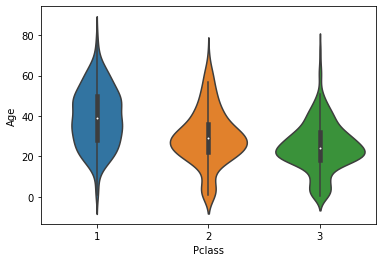

In [15]:
sns.violinplot(x='Pclass', y="Age", data=df_data_1)

Per farvi render conto di quanto sia importante rappresentare nel modo più sintetico i dati vi mostro un altro modo per visualizzare i dati di Age e Pclass:

<AxesSubplot:xlabel='Age', ylabel='Count'>

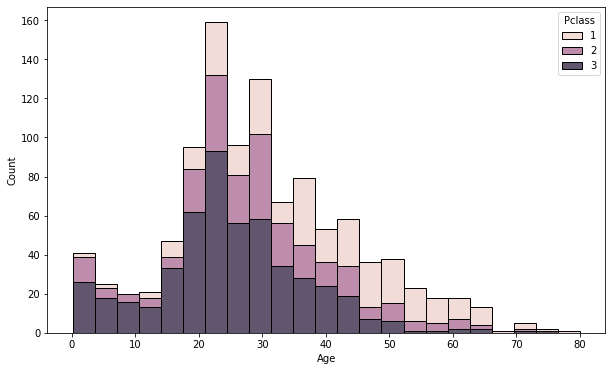

In [16]:
dimensions = (10, 6)
fig, ax = plt.subplots(figsize=dimensions)
sns.histplot(ax = ax, data=df_data_1, x="Age" , hue="Pclass",multiple="stack")

Anche qui si possono fare delle considerazioni ma risultano un po' più sparse. Chiaro il discorso? In questa rappresentazione si vede meglio quale sia la proporzione tra le classi

To address the problem of missing values for the **<span style='color:#F1C40F'>Age</span>** field we will proceed as follows. Since **<span style='color:#F1C40F'>PClass</span>** is the variable that is **<span style='color:#F1C40F'>most correlated</span>** with both Age and Survived, we will group passengers according to the class they belong to. What we will do is replace the missing values with the **<span style='color:#F1C40F'>median</span>** of each group. In fact, what is more, within each of the existing classes we will make a **<span style='color:#F1C40F'>gender distinction</span>**. We do this because, as we will see below, the median of Age varies according to whether the passenger is male or female.

In [17]:
sr_mediana = df_data_1.groupby(['Sex', 'Pclass']).median()['Age']
sr_mediana
#for i in range(0,sr_mediana.shape[0]):
#    if i<3: 
#        print('Median age for female of class {}: {}'.format(i+1,sr_mediana[1][i+1]))
#    else:
#        print('Median age for male of class {}: {}'.format(i+1-3,sr_mediana[0][i+1-3]))
df_data_1.Age = df_data_1.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
#print('Missing values for Age: {}'.format(df_data.Age.isnull().sum()))

4.2 Embarked Missing Values
---

Negli imbarcati 2 solo campi sono vuoti. Sostituiamo i vuoti con il valore più frequente, ossia la moda. In questo caso la moda è 2.

In [18]:
df_data_1.Embarked.value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [19]:
df_data_1.Embarked.fillna(df_data_1.Embarked.mode()[0], inplace = True)
pd.isnull(df_data_1).sum()

Age                0
Cabin           1014
Embarked           0
Fare               1
Name               0
Parch              0
PassengerId        0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
UnknownCabin     418
dtype: int64

In [20]:
df_data_1.shape[1]

13

4.3 Class, Age and Sex
---

Per capire i dati che seguono è utile capire un po' di più sullo scopo del Titanic. Su Wikipedia viene mostrato il percorso che avrebbe dovuto fare il transatlantico: partenza Southampton, raccolta passeggeri a Cherbourg e Queenstown e destinazione New York. In quale posto migliore si poteva approdare per trovare un posto di lavoro  in America?

Per questo il transatlantico era per la maggior parte composto da immigranti in cerca di fortuna. E' molto probabile quindi che gli immigranti fossero intere famiglie.

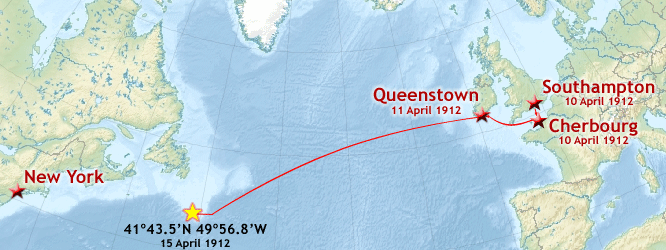

Vediamo il numero di passeggeri suddiviso per classe ..

In [21]:
sr_Age_Pclass1 = (df_data_1['Pclass']==1).sum()
sr_Age_Pclass2 = (df_data_1['Pclass']==2).sum()
sr_Age_Pclass3 = (df_data_1['Pclass']==3).sum()


In [22]:
d_Age_Pclass = {'Passengers per Pclass':[sr_Age_Pclass1, sr_Age_Pclass2, sr_Age_Pclass3] }
sr_Age_Pclass = pd.DataFrame(data=d_Age_Pclass , index=[1, 2, 3])  
sr_Age_Pclass

Passengers per Pclass
1                    323
2                    277
3                    709

.. e diviso per sesso, poi li raggruppiamo..

In [23]:
sr_Sex_Pclass1 = df_data_1.groupby('Sex')['Pclass'].apply(lambda x: x[x ==1].count()) 
sr_Sex_Pclass2 = df_data_1.groupby('Sex')['Pclass'].apply(lambda x: x[x ==2].count()) 
sr_Sex_Pclass3 = df_data_1.groupby('Sex')['Pclass'].apply(lambda x: x[x ==3].count()) 
sr_Sex_Pclass1 

Sex
0    179
1    144
Name: Pclass, dtype: int64

Ora creiamo una tabella riassuntiva per capire la percentuale di passeggeri suddivisa per sesso e classe e la combiniamo con la rappresentazione della funzione di distribuzione dell'età per ciascuna delle categorie (2 sessi x 3 classi). 

Rappresentare la distribuzione dell'età significa concepire l'età come una distribuzione gaussiana , calcolandone i due parametri che la caratterizzano: Media e Deviazione standard.

In [24]:
#NOTA1: dfAgeSexPclassStat[dfAgeSexPclassStat.index.values[i]]
#NOTA2: dfAgeSexPclassStat.loc[0][0:3] seleziona Mean e StdDev per gli uomini

In [25]:
df_AgeSexPclassMean=df_data_1.groupby((['Sex', 'Pclass'])).mean()['Age']
df_AgeSexPclassMean=df_AgeSexPclassMean.rename('Mean')
df_AgeSexPclassStd=df_data_1.groupby((['Sex', 'Pclass'])).std()['Age']
df_AgeSexPclassStd=df_AgeSexPclassStd.rename('StdDev')

In [26]:
dfAgeSexPclassStat = pd.concat([df_AgeSexPclassMean,df_AgeSexPclassStd] , axis = 1)
dfAgeSexPclassStat 

Mean     StdDev
Sex Pclass                      
0   1       41.181117  13.387543
    2       30.715380  13.436893
    3       25.681197   9.834920
1   1       36.958333  13.715325
    2       27.513396  12.726230
    3       22.130417  10.228949

Calcolo le percentuali di uomini e donne per classe e modifico il nome della serie 

In [27]:
d_Male_Pclass  = {"Male Pass. Perc. per Class":[sr_Sex_Pclass1[0],sr_Sex_Pclass2[0],sr_Sex_Pclass3[0]]}
sr_Male_Pclass = pd.DataFrame(data=d_Male_Pclass , index = [1,2,3])
sr_Male_Pclass_perc = (sr_Male_Pclass/len(df_data_1))*100

In [28]:
d_Female_Pclass  = {"Female Pass. Perc. per Class":[sr_Sex_Pclass1[1],sr_Sex_Pclass2[1],sr_Sex_Pclass3[1]]}
sr_Female_Pclass = pd.DataFrame(data=d_Female_Pclass , index = [1,2,3])
sr_Female_Pclass_perc = (sr_Female_Pclass/len(df_data_1))*100

Modifico la label di media e deviazione standard per uomini e donne per classe

In [29]:
sr_Male_Pclass_Age_Mean = dfAgeSexPclassStat.loc[0]['Mean']
sr_Male_Pclass_Age_Mean = sr_Male_Pclass_Age_Mean.rename("Male Pass. Age Mean per Class")
sr_Male_Pclass_Age_Std = dfAgeSexPclassStat.loc[0]['StdDev']
sr_Male_Pclass_Age_Std = sr_Male_Pclass_Age_Std.rename("Male Pass. Age Std per Class")

In [30]:
sr_Female_Pclass_Age_Mean = dfAgeSexPclassStat.loc[1]['Mean']
sr_Female_Pclass_Age_Mean = sr_Female_Pclass_Age_Mean.rename("Female Pass. Age Mean per Class")
sr_Female_Pclass_Age_Std = dfAgeSexPclassStat.loc[1]['StdDev']
sr_Female_Pclass_Age_Std = sr_Female_Pclass_Age_Std.rename("Female Pass. Age Std per Class")

In [31]:
df_Sex_Pclass  = pd.concat([sr_Male_Pclass_perc , 
                             sr_Male_Pclass_Age_Mean , 
                             sr_Male_Pclass_Age_Std ,
                             sr_Female_Pclass_perc  , 
                             sr_Female_Pclass_Age_Mean  , 
                             sr_Female_Pclass_Age_Std  ] , axis = 1)
                            
 
df_Sex_Pclass

Male Pass. Perc. per Class  Male Pass. Age Mean per Class  \
1                   13.674561                      41.181117   
2                   13.063407                      30.715380   
3                   37.662338                      25.681197   

   Male Pass. Age Std per Class  Female Pass. Perc. per Class  \
1                     13.387543                     11.000764   
2                     13.436893                      8.097785   
3                      9.834920                     16.501146   

   Female Pass. Age Mean per Class  Female Pass. Age Std per Class  
1                        36.958333                       13.715325  
2                        27.513396                       12.726230  
3                        22.130417                       10.228949

In basso è rappresentata la percentuale di passeggeri per classe e sesso in modo visivo. Dal grafico si evidenzia che:
<ul>
    <li>La terza classe è il 44% dei passeggeri. I maschi sono poco più del doppio delle donne.</li>
    <li>La seconda classe è il 21% dei passeggeri. I maschi sono 1/3 in più rispetto alle donne.</li>
    <li>La prima classe è 24% dei passeggeri. I maschi sono 1/5 in più rispetto alle donne.</li>
</ul>
Questi risultati sono una conferma del fatto che gli immigranti erano una componente preponderante dei passeggeri. 

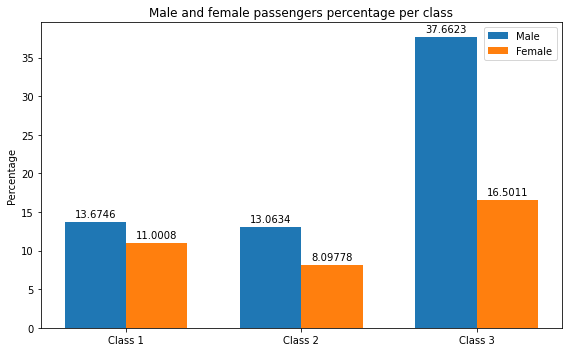

In [32]:
dimensions = (8, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_Sex_Pclass["Male Pass. Perc. per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_Sex_Pclass["Female Pass. Perc. per Class"], width, label='Female')

ax.set_ylabel('Percentage')
ax.set_title('Male and female passengers percentage per class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

In basso è rappresentata l'età media dei passeggeri per classe e sesso in modo visivo. Dal grafico si evidenzia che:
<ul>
    <li>La differenza d'età tra uomini e donne è di 4 anni indipendentemente dalla classe</li>
    <li>La media d'età è descrescente man mano che si abbassa il livello della classe sociale. Questo rafforza ancora una volta la considerazione che i giovani è più probabile che siano immigranti. Però potrebbe anche essere che la media è abbassata da eventuali figli a carico.</li>
</ul>
Questa distribuzione dei dati conferma la correlazione che avevo trovato inizialmente tra età e classe.

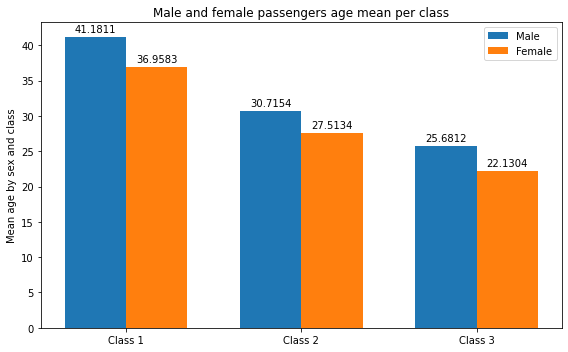

In [33]:
dimensions = (8, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_Sex_Pclass["Male Pass. Age Mean per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_Sex_Pclass["Female Pass. Age Mean per Class"], width, label='Female')

ax.set_ylabel('Mean age by sex and class')
ax.set_title('Male and female passengers age mean per class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

Nel prossimo grafico invece è rappresentata la deviazione standard dell'età per classe e sesso. Si evince che:
<ul>
    <li>la differenza di deviazione standard tra la distribuzione d'età di uomini e donne appartenenti alla medesima classe è piuttosto labile. Proviamo a fare il rapporto tra le deviazioni per classe:</li> 
    <ul>
        <li>Classe 1 : 0.98</li>
        <li>Classe 2 : 0.92</li>
        <li>Classe 3 : 0.96</li>
    </ul>    
    <li>la differenza di deviazione tra la Classe 1 e la Classe 2 è di meno di un anno </li>
    <li>la differenza di deviazione tra la Classe 2 e la Classe 3 è di un circa 3 anni </li>
    
</ul>
Per comprendere meglio il significato che la deviazione standard racchiude, vi ricordo due cose:
<ul>
    <li>la deviazione standard è la variazione media rispetto alla media. Il valore di deviazione non è nient'altro che la variazione in anni media rispetto alla media degli anni.</li>
    <li>un range intorno alla media di una deviazione standard racchiude il 68% dei dati. Un range di due deviazioni standard racchiude il 95% dei dati.</li>
</ul>

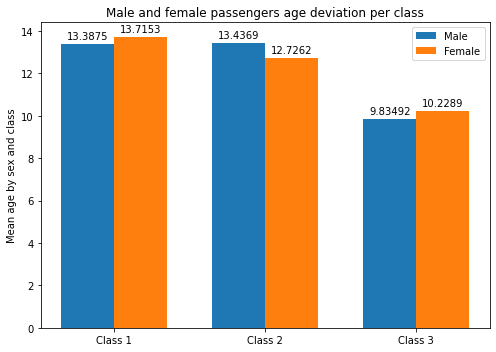

In [34]:
dimensions = (7, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_Sex_Pclass["Male Pass. Age Std per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_Sex_Pclass["Female Pass. Age Std per Class"], width, label='Female')

ax.set_ylabel('Mean age by sex and class')
ax.set_title('Male and female passengers age deviation per class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

4.4 Relation between Sex, Class and Survived
---

Per i sopravvissuti ho deciso di utlizzare solo i dati di train dato che i dati di test non sono etichettati

In [35]:
df_data_train['Survived'] = df_data_train['Survived'].astype("int64")

In [36]:
df_data_train_1 = df_data_train.copy()

Un altro check che possiamo fare è capire qual'è la percentuale di sopravvissuti per classe e per sesso. 

In [37]:
sr_Survived_Sex_Class = df_data_train_1.groupby(['Sex','Pclass']).Survived.apply((lambda x: (x==1).sum()))
sr_NotSurvived_Sex_Class = df_data_train_1.groupby(['Sex','Pclass']).Survived.apply((lambda x: (x==0).sum()))
sr_SurvivedRatio_Sex_Class = sr_Survived_Sex_Class/(sr_NotSurvived_Sex_Class+sr_Survived_Sex_Class)
df_SurvivedRatio_Sex_Class = pd.merge(sr_SurvivedRatio_Sex_Class[0],sr_SurvivedRatio_Sex_Class[1], left_index=True, right_index=True)
df_SurvivedRatio_Sex_Class = df_SurvivedRatio_Sex_Class.rename(columns={'Survived_x': "Male Ratio Survived per Class"}) 
df_SurvivedRatio_Sex_Class = df_SurvivedRatio_Sex_Class.rename(columns={'Survived_y': "Female Ratio Survived per Class"}) 

Nel grafico sotto ho voluto rappresentare la percentuale di sopravvivenza dei passeggeri divisa per classe e per sesso all'interno della classe. Questo significa che le percentuali che vedete sotto sono riferite al totale dei passeggeri per quella classe e per quel sesso. Vediamolo nel dettaglio:
    <ul>
         <li>Feature <b>Sex</b> : si vede chiaramente un netto divario tra la percentuale di sopravvissuti maschi e femmine. Nella Classe 1 il 97% delle femmine è sopravvissuto mentre dei maschi solo il 37%.</li>    
         <li>Feature <b>Class</b> : si denota una differenza nella sopravvivenza tra le femmine di prima e seconda classe e le femmine di terza classe. C'è anche una netta differenza tra i sopravvissuti maschi della prima classe e i sopravvissuti maschi di seconda e terza classe.</li>
    </ul>

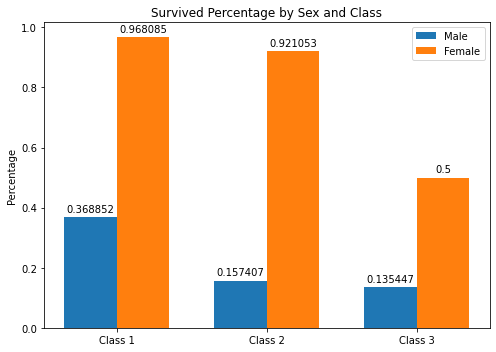

In [38]:
dimensions = (7, 5)
fig, ax = plt.subplots(figsize=dimensions)
labels = ["Class 1","Class 2","Class 3"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
bars_1=ax.bar( x - width/2, df_SurvivedRatio_Sex_Class["Male Ratio Survived per Class"], width, label='Male')
bars_2=ax.bar( x + width/2, df_SurvivedRatio_Sex_Class["Female Ratio Survived per Class"], width, label='Female')

ax.set_ylabel('Percentage')
ax.set_title('Survived Percentage by Sex and Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bars_1, padding=3)
ax.bar_label(bars_2, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

In [39]:
category_train = pd.cut(df_data_train_1.Age,bins=[0,2,17,65,99],labels=['Toddler/baby','Child','Adult','Elderly'])
df_data_train_1.insert(5,'Age Group',category_train)

category_all = pd.cut(df_data_1.Age,bins=[0,2,17,65,99],labels=['0','1','2','3'])
df_data_1.insert(5,'Age Group',category_all)


In [40]:
df_data_1.head()

Age Cabin  Embarked     Fare  \
0  22.0   NaN       2.0   7.2500   
1  38.0   C85       0.0  71.2833   
2  26.0   NaN       2.0   7.9250   
3  35.0  C123       2.0  53.1000   
4  35.0   NaN       2.0   8.0500   

                                                Name Age Group  Parch  \
0                            Braund, Mr. Owen Harris         2      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...         2      0   
2                             Heikkinen, Miss. Laina         2      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)         2      0   
4                           Allen, Mr. William Henry         2      0   

   PassengerId  Pclass  Sex  SibSp  Survived            Ticket  UnknownCabin  
0            1       3    0      1       0.0         A/5 21171           1.0  
1            2       1    1      1       1.0          PC 17599           0.0  
2            3       3    1      0       1.0  STON/O2. 3101282           1.0  
3            4       1    1      1       1.0            113803           0.0  
4            5       3    0      0       0.0            373450           1.0

5 Family
---

We will start by creating fields related to the family unit. The first of these will come from the SibSp and Parch fields, which we can remove later. This will reflect the size of passengers' family. We will also enter a field to indicate whether the passenger is travelling alone or not.

In [41]:
df_data_1['FamilySize'] = df_data_1.Parch + df_data_1.SibSp + 1
df_data_1['IsAlone'] = 0
df_data_1.loc[df_data_1['FamilySize'] == 1, 'IsAlone'] = 1

Nel grafico sotto è rappresentata la distribuzione in merito alla sopravvivenza in relazione al numero di componenti della famiglia. Bisogna fare attenzione al risultato perchè dev essere valutato un confounder che è correlato alla dimensione della famiglia, la classe. 

Nelle elaborazioni sopra abbiamo affermato che i passeggeri di 1^a Classe hanno più probabilità di sopravvivere ma i passeggeri di questa classe hanno famiglie meno numerose rispetto a quelle di 3^a Classe. Questo si riflette anche nei grafici sottostanti.

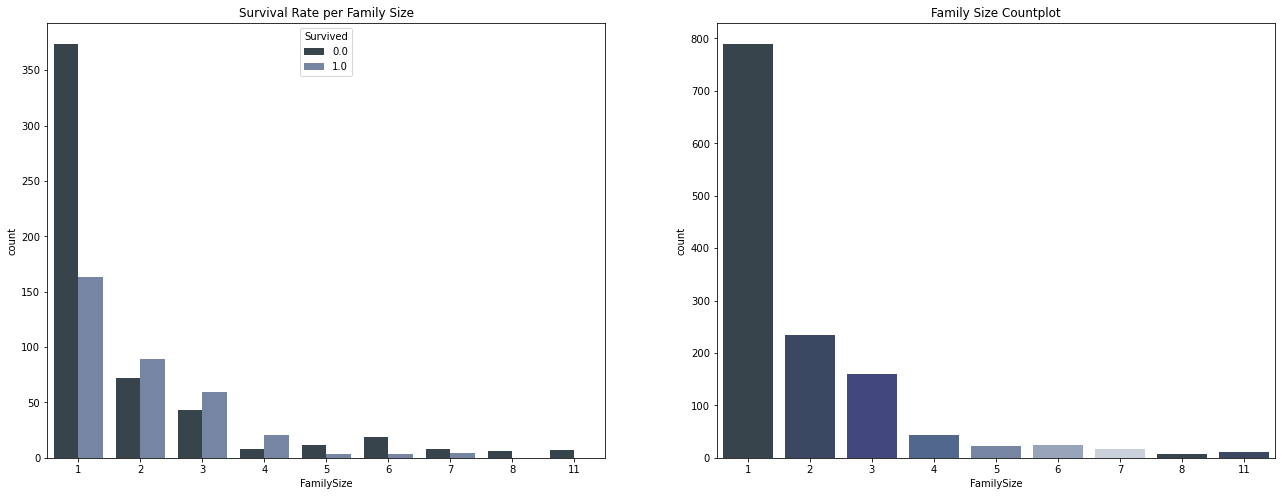

In [42]:
fig, axes = plt.subplots(figsize=(22,8), nrows = 1, ncols = 2)
ax = sns.countplot(x = 'FamilySize', hue='Survived', data = df_data_1, palette = ['#334550','#6D83AA'], ax = axes[0])
ax.set_title('Survival Rate per Family Size')
ax = sns.countplot(x = 'FamilySize', data = df_data_1, palette = ['#334550','#334668','#394184','#496595','#6D83AA','#91A2BF','#C8D0DF'], ax = axes[1])
_ = ax.set_title('Family Size Countplot')

In [43]:
df_data_1['Surname'] = df_data_1['Name'].str.split(', ', expand=True)[0]
df_data_1['Title'] =  df_data_1['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

# Create a new feature identifying children (15 or younger)
df_data_1['IsChild'] = np.where(df_data_1['Age'] < 16, 1, 0)


Grouping Families and Travellers
Sorting the data by Ticket, one finds that multiple passengers share the same ticket number. This can be used as a basis for grouping passengers that travelled together. It will also be useful to distinguish whether these passenger groups are immediate-related (1st-degree) families, entirely unrelated or non-immediate (e.g. friends, cousins), or a mix. We will also identify passengers who are travelling alone. We define:

<ul>
        <li> GroupID: an integer label uniquely identifying each group; a surrogate to Ticket.</li>
        <li>GroupSize: total number of passengers sharing a ticket.</li>
        <li>GroupType: categorization of group into 'Family', 'Non-Family', 'Mixed', 'IsAlone'.</li>
        <li>GroupNumSurvived: number of members in that group which are known to have survived.</li>
        <li>GroupNumPerished: number of members in that group which are known to have perished.</li>
</ul>

In [44]:
# Create mappings for assigning GroupID, GroupType, GroupSize, GroupNumSurvived, 
# and GroupNumPerished 
group_id = 1 
ticket_to_group_id = {} 
ticket_to_group_type = {}  
ticket_to_group_size = {}  
ticket_to_group_num_survived = {}
ticket_to_group_num_perished = {}
for (ticket, group) in df_data_1.groupby('Ticket'):
    #print(str(ticket)+str(group))
    # Categorize group type (Family, Non-Family, Mixed, )
    num_names = len(set(group['Surname'].values))  # number of unique names in this group
    group_size = len(group['Surname'].values)  # total size of this group
    if group_size > 1:
        if num_names == 1:
            ticket_to_group_type[ticket] = 'Family'
        elif num_names == group_size:
            ticket_to_group_type[ticket] = 'NonFamily'
        else:
            ticket_to_group_type[ticket] = 'Mixed'
    else:
        ticket_to_group_type[ticket] = 'IsAlone'
            
    # assign group size and grouop identifier
    ticket_to_group_size[ticket] = group_size
    ticket_to_group_id[ticket] = group_id
    ticket_to_group_num_survived[ticket] = group[group['Survived'] == 1]['Survived'].count()
    ticket_to_group_num_perished[ticket] = group[group['Survived'] == 0]['Survived'].count()
    group_id += 1
    
# Apply the mappings we've just defined to create the GroupID and GroupType variables
df_data_1['GroupID'] = df_data_1['Ticket'].map(ticket_to_group_id)
df_data_1['GroupSize'] = df_data_1['Ticket'].map(ticket_to_group_size)    
df_data_1['GroupType'] = df_data_1['Ticket'].map(ticket_to_group_type)  
df_data_1['GroupNumSurvived'] = df_data_1['Ticket'].map(ticket_to_group_num_survived)
df_data_1['GroupNumPerished'] = df_data_1['Ticket'].map(ticket_to_group_num_perished)

# Let's print the first 4 group entries to check that our grouping was successful
counter = 1
break_point = 4
feature_list = ['Surname', 'FamilySize','Ticket','GroupID','GroupType', 'GroupSize']
print('Printing Sample Data Entries to Verify Grouping:\n')
for (ticket, group) in df_data_1.groupby('Ticket'):
    print('\n', group[feature_list])
    if counter == break_point:
        break
    counter += 1

# Let's also check that GroupNumSurvived and GroupNumPerished were created accurately
feature_list = ['GroupID', 'GroupSize', 'Survived','GroupNumSurvived', 'GroupNumPerished']
df_data_1[feature_list].sort_values(by=['GroupID']).head(15)

Printing Sample Data Entries to Verify Grouping:


     Surname  FamilySize  Ticket  GroupID  GroupType  GroupSize
257  Cherry           1  110152        1  NonFamily          3
504  Maioni           1  110152        1  NonFamily          3
759  Rothes           1  110152        1  NonFamily          3

      Surname  FamilySize  Ticket  GroupID GroupType  GroupSize
262  Taussig           3  110413        2    Family          3
558  Taussig           3  110413        2    Family          3
585  Taussig           3  110413        2    Family          3

       Surname  FamilySize  Ticket  GroupID  GroupType  GroupSize
110    Porter           1  110465        3  NonFamily          2
475  Clifford           1  110465        3  NonFamily          2

       Surname  FamilySize  Ticket  GroupID GroupType  GroupSize
1226  Maguire           1  110469        4   IsAlone          1


GroupID  GroupSize  Survived  GroupNumSurvived  GroupNumPerished
504         1          3       1.0                 3                 0
257         1          3       1.0                 3                 0
759         1          3       1.0                 3                 0
585         2          3       1.0                 2                 1
262         2          3       0.0                 2                 1
558         2          3       1.0                 2                 1
110         3          2       0.0                 0                 2
475         3          2       0.0                 0                 2
1226        4          1       NaN                 0                 0
1049        5          1       NaN                 0                 0
430         6          1       1.0                 1                 0
366         7          2       1.0                 1                 0
1127        7          2       NaN                 1                 0
1082        8          1       NaN                 0                 0
170         9          1       0.0                 0                 1

In [45]:
df_data_1

Age            Cabin  Embarked      Fare  \
0     22.00              NaN       2.0    7.2500   
1     38.00              C85       0.0   71.2833   
2     26.00              NaN       2.0    7.9250   
3     35.00             C123       2.0   53.1000   
4     35.00              NaN       2.0    8.0500   
5     25.00              NaN       1.0    8.4583   
6     54.00              E46       2.0   51.8625   
7      2.00              NaN       2.0   21.0750   
8     27.00              NaN       2.0   11.1333   
9     14.00              NaN       0.0   30.0708   
10     4.00               G6       2.0   16.7000   
11    58.00             C103       2.0   26.5500   
12    20.00              NaN       2.0    8.0500   
13    39.00              NaN       2.0   31.2750   
14    14.00              NaN       2.0    7.8542   
15    55.00              NaN       2.0   16.0000   
16     2.00              NaN       1.0   29.1250   
17    29.50              NaN       2.0   13.0000   
18    31.00              NaN       2.0   18.0000   
19    22.00              NaN       0.0    7.2250   
20    35.00              NaN       2.0   26.0000   
21    34.00              D56       2.0   13.0000   
22    15.00              NaN       1.0    8.0292   
23    28.00               A6       2.0   35.5000   
24     8.00              NaN       2.0   21.0750   
25    38.00              NaN       2.0   31.3875   
26    25.00              NaN       0.0    7.2250   
27    19.00      C23 C25 C27       2.0  263.0000   
28    22.00              NaN       1.0    7.8792   
29    25.00              NaN       2.0    7.8958   
30    40.00              NaN       0.0   27.7208   
31    36.00              B78       0.0  146.5208   
32    22.00              NaN       1.0    7.7500   
33    66.00              NaN       2.0   10.5000   
34    28.00              NaN       0.0   82.1708   
35    42.00              NaN       2.0   52.0000   
36    25.00              NaN       0.0    7.2292   
37    21.00              NaN       2.0    8.0500   
38    18.00              NaN       2.0   18.0000   
39    14.00              NaN       0.0   11.2417   
40    40.00              NaN       2.0    9.4750   
41    27.00              NaN       2.0   21.0000   
42    25.00              NaN       0.0    7.8958   
43     3.00              NaN       0.0   41.5792   
44    19.00              NaN       1.0    7.8792   
45    25.00              NaN       2.0    8.0500   
46    25.00              NaN       1.0   15.5000   
47    22.00              NaN       1.0    7.7500   
48    25.00              NaN       0.0   21.6792   
49    18.00              NaN       2.0   17.8000   
50     7.00              NaN       2.0   39.6875   
51    21.00              NaN       2.0    7.8000   
52    49.00              D33       0.0   76.7292   
53    29.00              NaN       2.0   26.0000   
54    65.00              B30       0.0   61.9792   
55    42.00              C52       2.0   35.5000   
56    21.00              NaN       2.0   10.5000   
57    28.50              NaN       0.0    7.2292   
58     5.00              NaN       2.0   27.7500   
59    11.00              NaN       2.0   46.9000   
60    22.00              NaN       0.0    7.2292   
61    38.00              B28       2.0   80.0000   
62    45.00              C83       2.0   83.4750   
63     4.00              NaN       2.0   27.9000   
64    42.00              NaN       0.0   27.7208   
65    25.00              NaN       0.0   15.2458   
66    29.00              F33       2.0   10.5000   
67    19.00              NaN       2.0    8.1583   
68    17.00              NaN       2.0    7.9250   
69    26.00              NaN       2.0    8.6625   
70    32.00              NaN       2.0   10.5000   
71    16.00              NaN       2.0   46.9000   
72    21.00              NaN       2.0   73.5000   
73    26.00              NaN       0.0   14.4542   
74    32.00              NaN       2.0   56.4958   
75    25.00            F G73       2.0    7.6500   
76  

6 Checking For Inconsistencies
===

In [46]:
# Check for cases where FamilySize = 1 but GroupType = Family
data_reduced = df_data_1[df_data_1['FamilySize'] == 1]
data_reduced = data_reduced[data_reduced['GroupType'] == 'Family']

# nri = 'NumRelatives inconsistency'
nri_passenger_ids = data_reduced['PassengerId'].values
nri_unique_surnames = set(data_reduced['Surname'].values)

# How many occurrences?
print('Number of nri Passengers: ', len(nri_passenger_ids))
print('Number of Unique nri Surnames: ',len(nri_unique_surnames))

# We will find that there are only 7 occurences, so let's go ahead and view them here:
data_reduced = data_reduced.sort_values('Name')
data_reduced[['Name', 'Ticket', 'Fare','Pclass',  'GroupID','GroupSize','GroupType']].head(int(len(nri_passenger_ids)))

Number of nri Passengers:  7
Number of Unique nri Surnames:  4


Name      Ticket   Fare  \
83                              Carrau, Mr. Francisco M      113059  47.10   
1294                             Carrau, Mr. Jose Pedro      113059  47.10   
538                            Risien, Mr. Samuel Beard      364498  14.50   
1273                         Risien, Mrs. Samuel (Emma)      364498  14.50   
1253       Ware, Mrs. John James (Florence Louise Long)    CA 31352  21.00   
1011                               Watt, Miss. Bertha J  C.A. 33595  15.75   
161   Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...  C.A. 33595  15.75   

      Pclass  GroupID  GroupSize GroupType  
83         1       36          2    Family  
1294       1       36          2    Family  
538        3      588          2    Family  
1273       3      588          2    Family  
1253       2      777          2    Family  
1011       2      765          2    Family  
161        2      765          2    Family

With the exception of Mrs. John James Ware, we see that each of these passengers is paired with another having the same surname; we can presume that these are 2nd-degree relations (such as cousins), hence why each still has FamilySize=1 (which refers only to immediate family).

In [47]:
#Check for cases where FamilySize > 1 but GroupType = NonFamily
data_reduced = df_data_1[df_data_1['FamilySize'] > 1]
data_reduced = data_reduced[data_reduced['GroupType'] == 'NonFamily']

# ngwr = 'not grouped with relatives'
ngwr_passenger_ids = data_reduced['PassengerId'].values
ngwr_unique_surnames = set(data_reduced['Surname'].values)

# How many occurences?
print('Number of ngwr Passengers: ', len(ngwr_passenger_ids))
print('Number of Unique ngwr Surnames: ',len(ngwr_unique_surnames))

feature_list = ['PassengerId', 'Name', 'Ticket', 'Fare','Pclass', 'Parch', 
                'SibSp', 'GroupID', 'GroupSize','GroupType']
data_reduced[feature_list].sort_values('GroupID').head(int(len(ngwr_unique_surnames)))

Number of ngwr Passengers:  17
Number of Unique ngwr Surnames:  17


PassengerId                                               Name  \
166           167             Chibnall, Mrs. (Edith Martha Bowerman)   
356           357                        Bowerman, Miss. Elsie Edith   
879           880      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
1041         1042              Earnshaw, Mrs. Boulton (Olive Potter)   
571           572      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
1247         1248     Brown, Mrs. John Murray (Caroline Lane Lamson)   
925           926                           Mock, Mr. Philipp Edmund   
1013         1014                    Schabert, Mrs. Paul (Emma Mock)   
275           276                  Andrews, Miss. Kornelia Theodosia   
765           766               Hogeboom, Mrs. John C (Anna Andrews)   
259           260                        Parrish, Mrs. (Lutie Davis)   
880           881       Shelley, Mrs. William (Imanita Parrish Hall)   
779           780  Robert, Mrs. Edward Scott (Elisabeth Walton Mc...   
689           690                  Madill, Miss. Georgette Alexandra   
591           592    Stephenson, Mrs. Walter Bertram (Martha Eustis)   
496           497                     Eustis, Miss. Elizabeth Mussey   
599           600       Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")   

        Ticket      Fare  Pclass  Parch  SibSp  GroupID  GroupSize  GroupType  
166     113505   55.0000       1      1      0       39          2  NonFamily  
356     113505   55.0000       1      1      0       39          2  NonFamily  
879      11767   83.1583       1      1      0       76          3  NonFamily  
1041     11767   83.1583       1      1      0       76          3  NonFamily  
571      11769   51.4792       1      0      2       77          2  NonFamily  
1247     11769   51.4792       1      0      2       77          2  NonFamily  
925      13236   57.7500       1      0      1       92          2  NonFamily  
1013     13236   57.7500       1      0      1       92          2  NonFamily  
275      13502   77.9583       1      0      1       93          3  NonFamily  
765      13502   77.9583       1      0      1       93          3  NonFamily  
259     230433   26.0000       2      1      0      148          2  NonFamily  
880     230433   26.0000       2      1      0      148          2  NonFamily  
779      24160  211.3375       1      1      0      188          4  NonFamily  
689      24160  211.3375       1      1      0      188          4  NonFamily  
591      36947   78.2667       1      0      1      628          2  NonFamily  
496      36947   78.2667       1      0      1      628          2  NonFamily  
599   PC 17485   56.9292       1      0      1      799          2  NonFamily

If we look at matching group IDs, then in some cases these inconsistencies may be due to passenger substitutions. However, we need to better understand the significance of the names in parenthesis.

Consider GroupID=628: we have "Miss Elizabith Eustis" and "Mrs. Walter Sephenson (Martha Eustis)". A quick check of geneology databases online reports that there was indeed a miss Mrs. Walter Bertram Stephenson that boarded the Titanic; in this case, Martha Eustis is her maiden name, while Mrs. Walter B. Stephenson gives her title in terms of her husband's name (an old-fashioned practice). Another example is for GroupID=77, where we have "Brown, Mrs. John Murray (Caroline Lane Lamson)" and "Appleton, Mrs. Edward Dale (Charlotte Lamson)", another case of two related passengers whose names are given in terms of those of their husbands.

Since this hunt for inconsistencies turned up only 17 entries, we can manually correct the Group Type in cases (such as these two examples) where it is obvious the passengers are indeed family.

In [48]:
# manually correcting some mislabeled group types
# note: if group size is greater than the number of listed names above, we assign to Mixed
passenger_ids_toFamily = [167, 357, 572, 1248, 926, 1014, 260, 881, 592, 497]
passenger_ids_toMixed = [880, 1042, 276, 766]
#qui sfruttiamo il boolean indexing che è molto comodo ma ha l'unico vincolo che devono essere esplicitati quali indici se 
#vogliono estrapolare e quali non estrapolare
df_data_1['GroupType'][df_data_1['PassengerId'].isin(passenger_ids_toFamily)] = 'Family'
df_data_1['GroupType'][df_data_1['PassengerId'].isin(passenger_ids_toMixed)] = 'Mixed'

## for verification:
# feature_list = ['PassengerId', 'Name', 'GroupID', 'GroupSize','GroupType']
# dataset[feature_list][dataset['PassengerId'].isin(
#         passenger_ids_toFamily)].sort_values('GroupID').head(len(passenger_ids_toFamily))

C:\Users\Fabry\.conda\envs\condaenv11042020\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Fabry\.conda\envs\condaenv11042020\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7 Feature relation with Survived
===

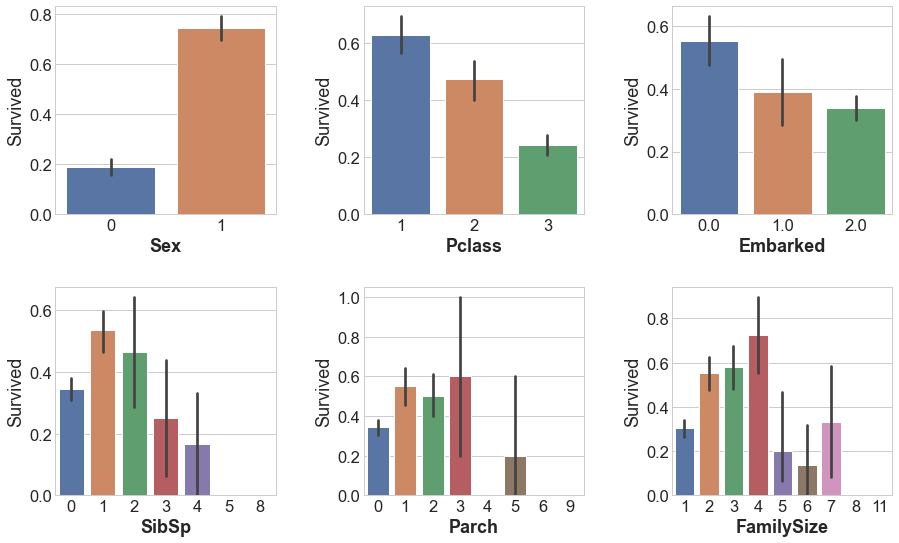

In [49]:
def barplots(dataframe, features, cols=2, width=10, height=10, hspace=0.5, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, column in enumerate(dataframe[features].columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        sns.barplot(x = column,y = 'Survived', data=dataframe)
        plt.xticks(rotation=0)
        plt.xlabel(column, weight='bold')

    
feature_list = ['Sex','Pclass', 'Embarked', 'SibSp', 'Parch', 'FamilySize']        
barplots(df_data_1, features=feature_list, cols=3, width=15, height=40, hspace=0.35, wspace=0.4)

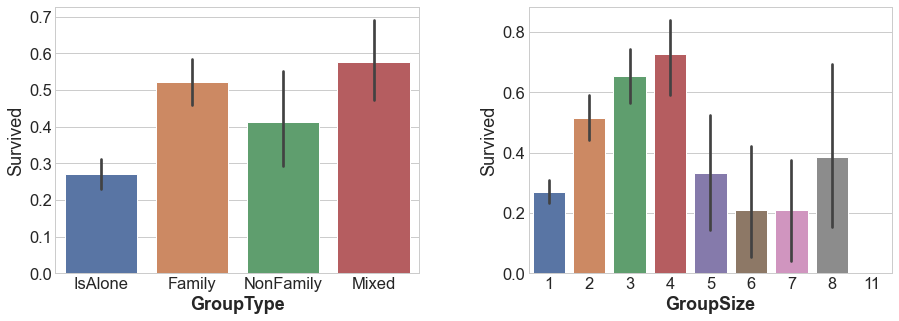

In [50]:
feature_list = ['GroupType','GroupSize']        
barplots(df_data_1, features=feature_list, cols=2, width=15, height=75, hspace=0.3, wspace=0.3)

Note that the black 'error bars' on our plots represent 95% confidence intervals. For practical purposes, when comparing survival versus feature values, these bars can be thought of as statistical uncertainties given our limited sample size and the spread in the data.

Findings:
<ul>
        <li>Sex and Pclass both show a strong statistically significant influence on survival.</li> 
        <li>FamilySize of 2-4 is more advantageous than larger families or passengers without family. Survival drops sharply at 
FamilySize=5 and beyond.</li> 
        <li>Embarked shows no clear trend; we will later investigate this feature in more detail.</li>
        <li>For GroupType, we can clearly see that lone passengers have a lower survival probability compared to other groups (note, this also mirrors what we see for FamilySize=1 and GroupSize=1). Between the other three categories of Family, NonFamily, and Mixed, the wide confidence bounds on the latter two make it difficult to assert whether any of these three have a statistically significant advantage relative to each other.</li> 
        <li>For GroupSize, we see a trend similar to the one we observed for FamilySize, where survival increases up to GroupSize=4, and then drops off sharply for group sizes of 5 and above. However, compared to FamilySize, the confidence bounds for this variable are tighter, and the relation between survival and GroupSize up to 4 appears more linear, suggesting that GroupSize may be a better variable for model training than FamilySize.</li>
</ul>

Given the FamilySize feature, it is not clear whether SibSp and Parch are now gratuitous, or whether they can still offer some valuable insight. This will need further investigation.

8 Fare
===

Our research found that ticket price was cumulative based on the number of passengers sharing that ticket. We therefore define a new fare variable, 'SplitFare', that subdivides the ticket price based on the number of passengers sharing that ticket. We also create 'log10Fare' and 'log10SplitFare' to map these to a base-ten logarithmic scale.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

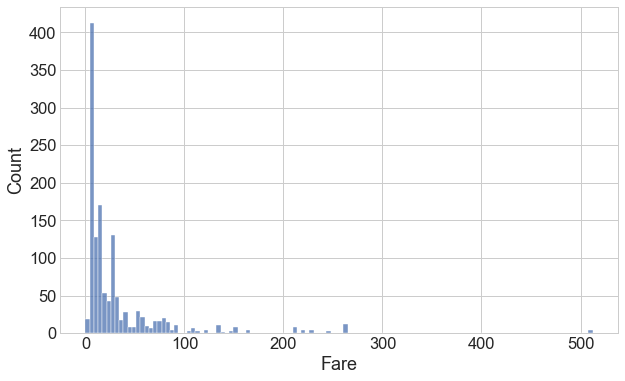

In [51]:
dimensions = (10, 6)
fig, ax = plt.subplots(figsize=dimensions)
sns.histplot(ax = ax, data=df_data_1, x="Fare" , multiple="stack")

La conversione logaritmica in questo caso ha perfettamente senso perchè il range di dati è molto ampio e su scale diverse. Il logaritmo permette di rendere "comparabile" ciò che è molto piccolo con ciò che è molto grande

In [52]:
# split the fare based on GroupSize; express as fare-per-passenger on a shared ticket
df_data_1['SplitFare'] = df_data_1.apply(lambda row: row['Fare']/row['GroupSize'], axis=1)

# Verify new feature definition
features_list = ['GroupSize', 'Fare', 'SplitFare']
df_data_1[features_list].head()

# Map to log10 scale
df_data_1['log10Fare'] = np.log10(df_data_1['Fare'].values + 1)
df_data_1['log10SplitFare'] = np.log10(df_data_1['SplitFare'].values + 1)

In [53]:
#mediana = df_data_1.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
#df_data_1.Fare = df_data_1.Fare.fillna(mediana)

Vogliamo verificare se sussiste un qualche legame tra il prezzo del biglietto complessivo (quindi per nucleo non per singola persona) e la probabilità di sopravvivenza.

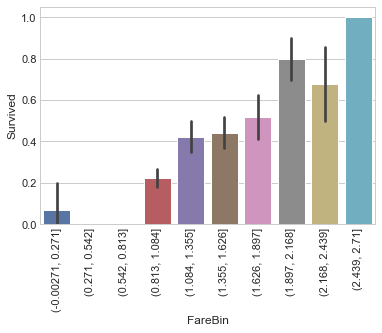

In [54]:
sns.set(font_scale=1.0)
plt.style.use('seaborn-whitegrid')
plt.xticks(rotation=90)
df_data_1['FareBin'] = pd.cut(df_data_1['log10Fare'], bins=10)
g = sns.barplot(x = 'FareBin',y = 'Survived', data=df_data_1)

Dal grafico si vede che la relazione ha un trend crescente e simil-lineare. Se teniamo però conto dell'intervallo di confidenza, rappresentato dai segmenti neri delle singole barre, possiamo dedurre che l'incertezza è abbastanza elevata.

Vogliamo poi verificare se ci sia una qualche diversità, confrontando i prezzi per persona con i sopravvissuti. 

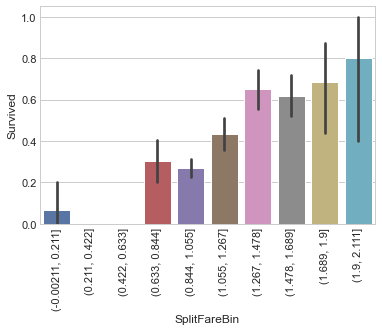

In [55]:
sns.set(font_scale=1.0)
plt.style.use('seaborn-whitegrid')
plt.xticks(rotation=90)
df_data_1['SplitFareBin'] = pd.cut(df_data_1['log10SplitFare'], bins=10)
g = sns.barplot(x = 'SplitFareBin',y = 'Survived', data=df_data_1)

La differenza è irrisoria rispetto al grafico precedente.

9 Cabin
---

IDEE
- rappresentazione della raccolta dei passeggeri attraverso la distribuzione dei punti con una rete neurale

Findings:

CabinDeck appears to have no significant influence on survival.
A few other comments:

The cabin data we have exists predominantly for members of Pclass=1; it is missing for nearly all other passengers.

We know that gates in some of the stairwells leading to higher decks were left shut, due to the segregation of 3rd-class passengers from the rest. This of course mainly impacted survival in Pclass=3.

The iceberg penetrated the Titanic below deck G. Hence, there wasn't any localized damage/flooding directly to any of the cabins we are considering.

Lower-class passengers were not necessarily on lower decks than higher-class passengers. The following schematic of passenger class cabin distributions shows that most decks contained a mix of classes, albeit 3rd-class passengers tended to be far towards the rear or front of the ship:


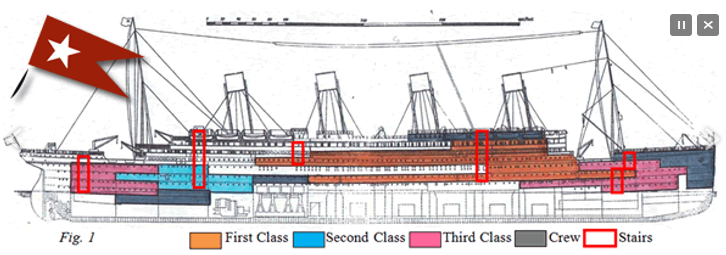

**<span style='color:#F1C40F'>Cabin</span>** feature is little bit tricky and it needs further exploration. The large portion of the Cabin feature is missing and the feature itself **<span style='color:#F1C40F'>can't be ignored completely because some the cabins might have higher survival rates</span>**. It turns out to be the first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.

* On the Boat Deck there were **6** rooms labeled as **T, U, W, X, Y, Z** but only the **T** cabin is present in the dataset
* **A**, **B** decks were only for 1st class passengers and 2st class passengers (smoking rooms)
* **C** first class for the majority and a minority of crew, second class and thrid class passengers
* **D** and **E** decks were for all classes
* **F** and **G** decks were for both 2nd and 3rd class passengers


https://www.encyclopedia-titanica.org/cabins.html
FIRST CLASS
- Boat Deck			6 cabins, accommodation for 7 people.
- "T"	Blackwell, Mr Stephen Weart	Cave List	There is no evidence that anyone else occupied a Boat Deck cabin.
- A Deck			36 cabins, accommodation for 48 people.
- B Deck            101 numbered cabins, 2 of which are sitting rooms. Therefore it has 99 bedrooms with accomodation for 183 passengers.
- C Deck            Has 137 numbered cabins, 2 of which are sitting rooms. Therefore 135 cabins are able to accommodate 315 passengers.
- D Deck			Has a total of 49 cabins, being able to accommodate 119 passengers.
- E Deck			Has a total of 71 cabins, being able to accommodate 184 passengers.

SECOND CLASS
- dsfasad
- fasds


THIRD CLASS
- sfsd
- fasfs

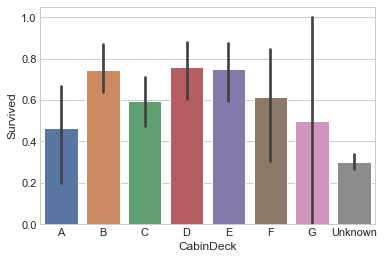

In [56]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_data_1['CabinDeck'] = df_data_1['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'Unknown')
sns.set(font_scale=1)
plt.style.use('seaborn-whitegrid')
g = sns.barplot(x = 'CabinDeck',y = 'Survived', data=df_data_1[df_data_1['CabinDeck'] != 'T'].sort_values('CabinDeck'))

10.1 Collecting external data of Cabin Deck and merging with main dataset
---

In [57]:
import re

In [58]:
dfCabinNumClass1 = pd.read_csv("./Class1Rooms.csv")
dfCabinNumClass2 = pd.read_csv("./Class2Rooms.csv")
dfCabinNumClass3 = pd.read_csv("./Class3Rooms.csv")

In [59]:
dfCabinPositionClass1 = pd.read_csv("./CabinAndFirstClassPassengers.csv")
dfCabinPositionClass1

BOAT DECK
0                 1. Mr. Stephen W. Blackwell L35 T 45
1                                               A DECK
2                     1. Mr. Harry M. Molson L30 A2 55
3               2. Mr. George B. Goldschmidt L34 A5 71
4                  3. Mr. Thomas F. McCaffry L75 A6 46
5                      4. Mr. James C. Smith L30 A7 56
6                     5. Mr. Thomson Beattie L75 A6 36
7                      6. Mr. Paul R. Chevre L29 A9 45
8                       7. Mr. John H. Ross L40 A10 36
9                   8. Miss Edith Rosenbaum L27 A11 34
10                 9. Mr. William T. Sloper L35 A12 28
11               10. Mr. George Q. Clifford L52 A14 40
12                 11. Mr. Robert W. Daniel L30 A15 27
13                12. Sir Cosmo Duff Gordon L39 A16 49
14                13. Mr. William C. Dulles L29 A18 39
15                 14. Mr. Richard W. Smith L26 A19 57
16                15. Lady Lucy Duff Gordon L56 A20 48
17                    16. Mr. John B. Brady L30 A21 41
18            17. Mr. Algernon H. Barkworth L30 A23 47
19        18. Mr. Washington A. Roebling II L50 A24 31
20           19. Colonel Oberst A. Simonius L35 A26 56
21                     20. Miss Edith Evans L31 A29 36
22                      21. Mr. Henry Blank L31 A31 39
23                     22. Mr. Hugh R. Rood L50 A32 38
24                 23. Dr. Washington Dodge L81 A34 52
25                      24. Mrs. Ruth Dodge L81 A34 34
26               25. Master Washington Dodge L81 A34 4
27         26. Mr. Thomas Andrews Complementary A36 39
28                                    B DECK (FORWARD)
29                 1. Mrs. Elisabeth Robert L211 B3 43
30                  2. Miss Elisabeth Allen L211 B5 29
31                 3. Miss Georgette Madill L211 B5 16
32                  4. Mr. Christopher Head L42 B11 42
33                      5. Mrs. Ida Hippach L57 B18 44
34                     6. Miss Jean Hippach L57 B18 17
35              7. Mr. Wyckoff Van der Hoef L33 B19 61
36                    8. Mr. Albert A. Dick L57 B20 31
37                        9. Mrs. Vera Dick L57 B20 17
38             10. Captain Edward G. Crosby L71 B22 70
39                11. Mrs. Catherine Crosby L71 B22 64
40   12. Mr. Vivian P. Payne (Hays Assistant) L93 B...
41                13. Miss Harriette Crosby L26 B26 39
42                    14. Mrs. Martha Stone L80 B28 62
43       15. Miss Amelie Icard (Stone Maid) L80 B28 38
44               16. Mr. Engelhart C. Ostby L61 B30 64
45                17. Mr. Albert A. Stewart L27 B31 54
46                18. Mr. Francis D. Millet L26 B32 65
47                 19. Miss Leontine Aubart L69 B35 24
48     20. Miss Emma Sagesser (Aubart Maid) L69 B35 24
49                     21. Miss Helen Ostby L61 B36 22
50                   22. Mr. Edward A. Kent L29 B37 58
51              23. Major Archibald W. Butt L26 B38 46
52                24. Miss Hedwig Frolicher L49 B39 22
53   25. Mr. Maximilian J. Frolicher-Stehli L79 B41 60
54     26. Mrs. Margaretha Frolicher-Stehli L79 B41 48
55                   27. Mr. John P. Snyder L82 B45 24
56                    28. Mrs. Nelle Snyder L82 B45 23
57              29. Mr. Dickinson H. Bishop L91 B49 25
58                    30. Mrs. Helen Bishop L91 B49 19
59                     31. Dr. Max Stahelin L30 B50 32
60                                 B DECK (ADMIDSHIPS)
61        1. Mr. Thomas D. Cardeza L512 B51,B53,B55 36
62       2. Mrs. Charlotte Cardeza L512 B51,B53,B55 58
63   3. Miss Annie Ward (Cardeza Maid) L512 B51,B53...
64   4. Mr. Gustave Lesurrer (Cardeza Manservant) L...
65   5. Mr. Joseph B. Ismay Complementary B52,B54,B...
66   6. Mr. John R. Fry (Ismay Manservant) Compleme...
67                   7. Mrs. Helene Baxter L247 B58 50
68                    8. Mrs. Mary Douglas L247 B58 27
69                  9. Mr. Quigg E. Baxter L247 B60 24
70                  10. Mr. Charles M. Hays L93 B69 55
71                      11. Mrs. Clara Hays L93 B69 52
72   12. Miss Mary Anne Perrea

Separo dalla stringa il deck e il numero della cabina e utilizzerò quest'informazione per fare un merge con il main dataset per vedere se riesco ad aggiungere qualche dato in più.

In [60]:
lDeckLetters=["A","B","C","D","E"]
dfCabinPositionClass1["CabinSplit1"] =  dfCabinPositionClass1["BOAT DECK"].str[-10:]
for j, item in enumerate(dfCabinPositionClass1["CabinSplit1"]):
    if item != "":
        numbers = re.findall('[0-9]+', item) 
        if len(numbers) > 1 & len(numbers) <=3:
            n_cabin = numbers[1]
            #cerco la lettera e il numero della cabina nella stringa facendo scorrere le lettere dei deck
            for i,letter in enumerate(lDeckLetters):
                if item.find(lDeckLetters[i]+n_cabin)!=-1:
                    dfCabinPositionClass1.at[j,'Cabin Deck']=(str(lDeckLetters[i])+str(n_cabin))                 
                    break
                      

In [61]:
dfCabinPositionClass1.head(10)

BOAT DECK CabinSplit1 Cabin Deck
0    1. Mr. Stephen W. Blackwell L35 T 45  l L35 T 45        NaN
1                                  A DECK      A DECK        NaN
2        1. Mr. Harry M. Molson L30 A2 55   L30 A2 55         A2
3  2. Mr. George B. Goldschmidt L34 A5 71   L34 A5 71         A5
4     3. Mr. Thomas F. McCaffry L75 A6 46   L75 A6 46         A6
5         4. Mr. James C. Smith L30 A7 56   L30 A7 56         A7
6        5. Mr. Thomson Beattie L75 A6 36   L75 A6 36         A6
7         6. Mr. Paul R. Chevre L29 A9 45   L29 A9 45         A9
8          7. Mr. John H. Ross L40 A10 36  L40 A10 36        A10
9      8. Miss Edith Rosenbaum L27 A11 34  L27 A11 34        A11

In [62]:
dfCabinPositionClass1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BOAT DECK    304 non-null    object
 1   CabinSplit1  304 non-null    object
 2   Cabin Deck   285 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [63]:
df_data_1['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer',
       'Dona'], dtype=object)

In [64]:
lAttributes = ["Mr","Mrs","Miss","Master","Lady","Countess","Colonel", "Sir","Captain","Major","Dr"]
#dfCabinPositionClass1["Name"]=dfCabinPositionClass1["Name"].astype(str)
for j, item in enumerate(dfCabinPositionClass1["BOAT DECK"]):
    print("Riga : "+str(j))
    for i,attr in enumerate(lAttributes):
        #2 punti nella stringa : significa che c'è un doppio nome e un punto davanti al titolo
        l_index=[index for index in range(len(item)) if item.startswith('.',index) ]     

        
        #Il punto nella stringa è presente dopo il numero, dopo il titolo e dopo il secondo nome
        if len(l_index)==3:
            if item.find(attr+". ")!=-1:
                #salvo il titolo
                if attr == "Sir":
                    attrNew="Mr"
                elif attr == "Captain":
                    attrNew="Capt"
                elif attr == "Colonel":
                    attrNew="Col"
                else:
                    attrNew=attr
                dfCabinPositionClass1.at[j,"Title"]=attrNew
                #elimino la parte iniziale fino al titolo e salvo nome e cognome
                dfCabinPositionClass1.at[j,"Split1"]=item[(l_index[1]+1):].split('.')[0]
                dfCabinPositionClass1.at[j,"Name"]=dfCabinPositionClass1["Split1"].iloc[j].split(" ")[1]
                dfCabinPositionClass1.at[j,"Split2"]=item[(l_index[1]+1):].split('.')[1]
                dfCabinPositionClass1.at[j,"Surname"]=dfCabinPositionClass1["Split2"].iloc[j].split(" ")[1]
                print("3.1 : "+str(dfCabinPositionClass1["Name"].iloc[j])+" - "+str(dfCabinPositionClass1["Surname"].iloc[j]))
                break
            elif attr=="Dr":
                print("3.2: Nessun titolo trovato per : "+item)
                break           
            
        #qui devo capire se il punto manca dopo il titolo o se non c'è il titolo e devo capire se manca il secondo nome
        elif len(l_index)==2:
            #titolo seguito dal punto
            if item.find(attr+". ")!=-1 :
                if attr == "Sir":
                    attrNew="Mr"
                elif attr == "Captain":
                    attrNew="Capt"
                elif attr == "Colonel":
                    attrNew="Col"
                else:
                    attrNew=attr
                dfCabinPositionClass1.at[j,"Title"]=attrNew
                #elimino la parte iniziale fino al titolo e salvo nome e cognome
                dfCabinPositionClass1.at[j,"Name"]=item[(l_index[1]+1):].split(' ')[1]
                dfCabinPositionClass1.at[j,"Surname"]=item[(l_index[1]+1):].split(' ')[2]
                print("2.1.1 : "+str(dfCabinPositionClass1["Name"].iloc[j])+" - "+str(dfCabinPositionClass1["Surname"].iloc[j]))
                break
            elif item.find(attr+" ")!=-1:
                if attr == "Sir":
                    attrNew="Mr"
                elif attr == "Captain":
                    attrNew="Capt"
                elif attr == "Colonel":
                    attrNew="Col"
                else:
                    attrNew=attr
                dfCabinPositionClass1.at[j,"Title"]=attrNew
                #elimino la parte iniziale fino al titolo e salvo nome e cognome
                dfCabinPositionClass1.at[j,"Name"]=item[(l_index[0]):].split(' ')[2]
                dfCabinPositionClass1.at[j,"Surname"]=item[(l_index[0]):].split(' ')[4]
                print("2.1.2 : "+str(dfCabinPositionClass1["Name"].iloc[j])+" - "+str(dfCabinPositionClass1["Surname"].iloc[j]))
                break                
                
            #titolo non presente    
            else:
                if attr=="Dr":
                    print("2.2: Nessun titolo trovato per : "+item)
                    break
        
        
        elif len(l_index)==1:
            #titolo seguito dal punto
            if item.find(attr+". ")!=-1 :
                attrNew=attr
                dfCabinPositionClass1.at[j,"Title"]=attrNew
                #elimino la parte iniziale fino al titolo
                dfCabinPositionClass1.at[j,"Name"]=item[(l_index[0]+1):].split(' ')[2]
                dfCabinPositionClass1.at[j,"Surname"]=item[(l_index[0]):].split(' ')[3]
                print("1.1.1 : "+dfCabinPositionClass1.at[j,"Name"]+" - "+str(dfCabinPositionClass1["Surname"].iloc[j]))
                break    
            #titolo seguito dallo spazio
            elif item.find(attr+" ")!=-1:
                if attr == "Sir":
                    attrNew="Mr"
                elif attr == "Captain":
                    attrNew="Capt"
                elif attr == "Colonel":
                    attrNew="Col"
                else:
                    attrNew=attr
                dfCabinPositionClass1.at[j,"Title"]=attrNew
                #elimino la parte iniziale fino al titolo
                dfCabinPositionClass1.at[j,"Name"]=item[(l_index[0]+1):].split(' ')[2]
                dfCabinPositionClass1.at[j,"Surname"]=item[(l_index[0]):].split(' ')[3]
                print("1.1.2 : "+dfCabinPositionClass1.at[j,"Name"]+" - "+str(dfCabinPositionClass1["Surname"].iloc[j]))
                break
            #titolo non presente    
            else:
                if attr=="Dr":
                    print("1.3 Nessun titolo trovato per : "+item) 
                    break
                    
                    
        else:
            print("Nothing interesting..")
            break

Riga : 0
3.1 : Stephen - Blackwell
Riga : 1
Nothing interesting..
Riga : 2
3.1 : Harry - Molson
Riga : 3
3.1 : George - Goldschmidt
Riga : 4
3.1 : Thomas - McCaffry
Riga : 5
3.1 : James - Smith
Riga : 6
2.1.1 : Thomson - Beattie
Riga : 7
3.1 : Paul - Chevre
Riga : 8
3.1 : John - Ross
Riga : 9
1.1.2 : Edith - Rosenbaum
Riga : 10
3.1 : William - Sloper
Riga : 11
3.1 : George - Clifford
Riga : 12
3.1 : Robert - Daniel
Riga : 13
1.1.2 : Cosmo - Duff
Riga : 14
3.1 : William - Dulles
Riga : 15
3.1 : Richard - Smith
Riga : 16
1.1.2 : Lucy - Duff
Riga : 17
3.1 : John - Brady
Riga : 18
3.1 : Algernon - Barkworth
Riga : 19
3.1 : Washington - Roebling
Riga : 20
2.1.2 : Oberst - Simonius
Riga : 21
1.1.2 : Edith - Evans
Riga : 22
2.1.1 : Henry - Blank
Riga : 23
3.1 : Hugh - Rood
Riga : 24
2.1.1 : Washington - Dodge
Riga : 25
2.1.1 : Ruth - Dodge
Riga : 26
1.1.2 : Washington - Dodge
Riga : 27
2.1.1 : Thomas - Andrews
Riga : 28
Nothing interesting..
Riga : 29
2.1.1 : Elisabeth - Robert
Riga : 30
1.1.

Riga : 297
2.1.1 : Julia - Cavendish
Riga : 298
3.1 : Edgar - Meyer
Riga : 299
2.1.1 : Leila - Meyer
Riga : 300
2.1.1 : George - Rosenshine
Riga : 301
1.1.2 : Gertrude - Thorne
Riga : 302
1.1.2 : John - Weir
Riga : 303
2.1.1 : George - Wright


In [65]:
dfCabinPositionClass1

BOAT DECK CabinSplit1 Cabin Deck  \
0                 1. Mr. Stephen W. Blackwell L35 T 45  l L35 T 45        NaN   
1                                               A DECK      A DECK        NaN   
2                     1. Mr. Harry M. Molson L30 A2 55   L30 A2 55         A2   
3               2. Mr. George B. Goldschmidt L34 A5 71   L34 A5 71         A5   
4                  3. Mr. Thomas F. McCaffry L75 A6 46   L75 A6 46         A6   
5                      4. Mr. James C. Smith L30 A7 56   L30 A7 56         A7   
6                     5. Mr. Thomson Beattie L75 A6 36   L75 A6 36         A6   
7                      6. Mr. Paul R. Chevre L29 A9 45   L29 A9 45         A9   
8                       7. Mr. John H. Ross L40 A10 36  L40 A10 36        A10   
9                   8. Miss Edith Rosenbaum L27 A11 34  L27 A11 34        A11   
10                 9. Mr. William T. Sloper L35 A12 28  L35 A12 28        A12   
11               10. Mr. George Q. Clifford L52 A14 40  L52 A14 40        A14   
12                 11. Mr. Robert W. Daniel L30 A15 27  L30 A15 27        A15   
13                12. Sir Cosmo Duff Gordon L39 A16 49  L39 A16 49        A16   
14                13. Mr. William C. Dulles L29 A18 39  L29 A18 39        A18   
15                 14. Mr. Richard W. Smith L26 A19 57  L26 A19 57        A19   
16                15. Lady Lucy Duff Gordon L56 A20 48  L56 A20 48        A20   
17                    16. Mr. John B. Brady L30 A21 41  L30 A21 41        A21   
18            17. Mr. Algernon H. Barkworth L30 A23 47  L30 A23 47        A23   
19        18. Mr. Washington A. Roebling II L50 A24 31  L50 A24 31        A24   
20           19. Colonel Oberst A. Simonius L35 A26 56  L35 A26 56        A26   
21                     20. Miss Edith Evans L31 A29 36  L31 A29 36        A29   
22                      21. Mr. Henry Blank L31 A31 39  L31 A31 39        A31   
23                     22. Mr. Hugh R. Rood L50 A32 38  L50 A32 38        A32   
24                 23. Dr. Washington Dodge L81 A34 52  L81 A34 52        A34   
25                      24. Mrs. Ruth Dodge L81 A34 34  L81 A34 34        A34   
26               25. Master Washington Dodge L81 A34 4   L81 A34 4        A34   
27         26. Mr. Thomas Andrews Complementary A36 39  ary A36 39        NaN   
28                                    B DECK (FORWARD)   (FORWARD)        NaN   
29                 1. Mrs. Elisabeth Robert L211 B3 43  L211 B3 43         B3   
30                  2. Miss Elisabeth Allen L211 B5 29  L211 B5 29         B5   
31                 3. Miss Georgette Madill L211 B5 16  L211 B5 16         B5   
32                  4. Mr. Christopher Head L42 B11 42  L42 B11 42        B11   
33                      5. Mrs. Ida Hippach L57 B18 44  L57 B18 44        B18   
34                     6. Miss Jean Hippach L57 B18 17  L57 B18 17        B18   
35              7. Mr. Wyckoff Van der Hoef L33 B19 61  L33 B19 61        B19   
36                    8. Mr. Albert A. Dick L57 B20 31  L57 B20 31        B20   
37                        9. Mrs. Vera Dick L57 B20 17  L57 B20 17        B20   
38             10. Captain Edward G. Crosby L71 B22 70  L71 B22 70        B22   
39                11. Mrs. Catherine Crosby L71 B22 64  L71 B22 64        B22   
40   12. Mr. Vivian P. Payne (Hays Assistant) L93 B...  L93 B24 22        B24   
41                13. Miss Harriette Crosby L26 B26 39  L26 B26 39        B26   
42                    14. Mrs. Martha Stone L80 B28 62  L80 B28 62        B28   
43       15. Miss Amelie Icard (Stone Maid) L80 B28 38  L80 B28 38        B28   
44               16. Mr. Engelhart C. Ostby L61 B30 64  L61 B30 64        B30   
45                17. Mr. Albert A. Stewart L27 B31 54  L27 B31 54        B31   
46                18. Mr. Francis D. Millet L26 B32 65  L26 B32 65        B32   
47                 19. Miss Leontine Aubart L69 B35 24  L69 B35 24        B35   
48     20. Miss Emma Sagesser (Aubart Maid) L69 B35 24  L69 B35 24        B3

10.2 Creating function for subplot representation
---

In [66]:
def groupplot(data, x , y , hue , n_subf , font_scale , wspace , palette , x_size , y_size ):
    fig = plt.figure( figsize=(x_size, y_size))
    subfigs = fig.subfigures(n_subf, 1, wspace=wspace)
    sns.set(font_scale=font_scale)

    for i in range(data["GroupSize"].max()):
        axs = subfigs[i].subplots(1, 3)
        subfigs[i].suptitle(" GroupSize :"+str(i+1), fontsize='x-large')
        for j , ax in enumerate(axs):
            try:
                sns.barplot(ax=ax, x = x, y= y, hue=hue , palette=palette,
                                    data=data[(data["Pclass"]==j+1) & (data["GroupSize"]==i+1)])
                plt.xticks(rotation=0)
                if j==2:
                    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
                ax.set_title("Class : "+ str(j+1), fontsize=18)

            except ValueError:
                continue






10.3 Grouping by GroupSize, Age and Cabin not survived
---

L'obiettivo in questa sezione, vuole essere quello di riuscire ad imputare un Deck che abbia un senso a buona parte dei passeggeri e assegnare una categoria a coloro il cui Deck risulta difficile da assegnare ma restringerlo il più possibile ad un range di Deck specifici per quella classe.

In [67]:
df_data_1["Age Group"]=df_data_1["Age Group"].astype(int)
df_data_1["GroupSize"]=df_data_1["GroupSize"].astype(int)
df_data_2=df_data_1[df_data_1['Survived']==0]

In [68]:
def dropRows (data , feature , l_min_th_value , feature_min_th , l_feature_min_th_cat):       
    for i , item in enumerate(zip(data[feature],data[feature_min_th])):
        if item[0] == 0.0 or item[0] < l_min_th_value[item[1]-1] or item[0]==np.nan: 

            try:
                data = data.drop(index= i )
                print(i,item)
            except AttributeError:
                print("Trying to access "+ str(i)+"-th row" )
    return data
                
df_data_2=df_data_2.reset_index(drop=True)
df_data_2=dropRows(data=df_data_2 , feature='SplitFare', l_min_th_value=[10,1,1]  , feature_min_th="Pclass" , l_feature_min_th_cat=[1,2,3])

120 (0.0, 3)
171 (0.0, 1)
178 (0.0, 2)
192 (0.0, 3)
253 (0.0, 2)
282 (0.0, 2)
293 (0.0, 2)
362 (0.0, 3)
384 (0.0, 1)
411 (0.0, 2)
446 (0.0, 2)
494 (0.0, 1)
502 (0.0, 1)
507 (0.0, 1)
536 (5.0, 1)


In [69]:
features = ['Pclass','GroupSize','Age Group','CabinDeck']
def GroupFare (data , features) :
    for i in range(data[features[0]].max()):
        df_Grouped_Count=data.query(features[0]+'=='+str(i+1)).groupby(features[1:4]).count().reset_index()
        df_Grouped_Count[features[0]]=i+1
        df_Grouped_fareMean=data.query(features[0]+'=='+str(i+1)).groupby(features[1:4]).SplitFare.mean().reset_index()
        df_Grouped_fareMean[features[0]]=i+1
        df_Grouped_fareStd=data.query(features[0]+'=='+str(i+1)).groupby(features[1:4]).SplitFare.std().reset_index()
        df_Grouped_fareStd[features[0]]=i+1
        if i==0 :
            df_CountByGroupAgeDeck = df_Grouped_Count.copy() 
            df_MeanByGroupAgeDeck =  df_Grouped_fareMean.copy() 
            df_StdByGroupAgeDeck = df_Grouped_fareStd.copy()
        if i>0 :
            df_CountByGroupAgeDeck = pd.concat([df_CountByGroupAgeDeck, df_Grouped_Count], ignore_index=True)
            df_MeanByGroupAgeDeck = pd.concat([df_MeanByGroupAgeDeck, df_Grouped_fareMean], ignore_index=True)
            df_StdByGroupAgeDeck = pd.concat([df_StdByGroupAgeDeck, df_Grouped_fareStd], ignore_index=True)
    return df_CountByGroupAgeDeck , df_MeanByGroupAgeDeck , df_StdByGroupAgeDeck

df_CountByGroupAgeDeckNotSurv , df_MeanByGroupAgeDeckNotSurv , df_StdByGroupAgeDeckNotSurv = GroupFare(data = df_data_2 , features = features)

In [70]:
palette={"A":'#D3F3EE',"B":'#7FB7BE',"C":'#513DD9',"D":'#DACC3E',"E":'#BC2C1A',
         "F":'#7D1538',"T":'#E38D8D',"G":'#44D93D',"Unknown":'#7F8C7F'}

groupplot( data = df_MeanByGroupAgeDeckNotSurv, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 100)

groupplot( data = df_StdByGroupAgeDeckNotSurv, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 100)



Considerazioni per il gruppo con passeggeri singoli:
<ul>
        <li>First Class: 3c'è un picco dei ticket per i passeggeri più vecchi. Non è chiaro a cosa sia dovuto. </li> 
        <li>Second Class: c'è una distinzione abbastanza chiara tra gli ordini di prezzo e le età</li> 
        <li>Third Class: tra i gruppi d'età il prezzo è costante. Potrebbe essere che appartengano tutti allo stesso Deck, Deck F per la precisione</li>           
</ul>

Considerazioni per il gruppo con gruppi di 2 passeggeri:
<ul>
        <li>First Class: c'è ancora una volta un picco dei ticket per i passeggeri più vecchi. In questo caso il Deck è noto ed il B. </li> 
        <li>Second Class: c'è ancora una volta una distinzione abbastanza chiara tra gli ordini di prezzo e le età. Possiamo presumere che:
        <ul>
            <li>La fascia di prezzo con media 9 del gruppo 1 (2-17 anni) sembra riferirsi al Deck F </li> 
            <li>La fascia di prezzo con media 5 del gruppo 2 (17-65 anni) si riferisce al Deck D </li> 
            <li>La fascia di prezzo con media 12 del gruppo 2 (17-65 anni) sembra riferirsi al Deck E </li> 
        </ul>
        <li>Third Class: anche in questo caso l'età del gruppo non fa variare la fascia di prezzo inter-classe che è:</li>              <ul>
            <li>con media 5 del gruppo 0 e 1 si riferisce al Deck G. Appare abbastanza chiara la fascia di prezzo per quel Deck </li> 
            <li>con media 7.5 sembra riferirsi al Deck F </li>  
        </ul>     
</ul>


Considerazioni per il gruppo con gruppi di 3 passeggeri:
<ul>
        <li>First Class: c'è ancora una volta un picco di prezzo per la classe B. Con buona approssimazione a questo punto posso associare al gruppo passeggero individuale con deck ignoto il Deck B</li>
        <li>Second Class:  
         <ul>
            <li>con media 6.5 sembra correlato al Deck E con qualche passeggero di Deck D e F che si può discriminare andando a verificare il prezzo puntuale </li> 
            <li>con media 8.5 quindi molto simile al prezzo con gruppo passeggeri pari a 2 sembra riferirsi al Deck F </li>  
         </ul>      
        </li>
        <li>Third Class: la media per gruppi d'età 1 e 2 è 6.5 e 7.5 quindi sembra ci sia  una prevalenza di passeggeri Deck F con pochi passeggeri Deck G</li>
</ul>


Considerazioni per il gruppo con gruppi di 4 passeggeri:
<ul>
        <li>First Class: </li>
        <li>Second Class: la media è intorno a  8.5 quindi sembra correlato al Deck F </li>
        <li>Third Class: la media è intorno a 3 quindi sembra correlato al Deck G</li>
</ul>


Considerazioni per il gruppo con gruppi di 5 passeggeri:
<ul>
        <li>First Class: la media sembra un <b>mix</b> di vari Deck. Sfruttando gli altri barplot si possono dedurre i prezzi medi e associare i Deck </li>
        <li>Second Class: la media è intorno a  8.5 quindi sembra correlato al Deck F </li>
        <li>Third Class: la media è intorno a 3 quindi sembra correlato al Deck G</li>
</ul>

Considerazioni per il gruppo con gruppi di 6 passeggeri:
<ul>
        <li>First Class: si vedono due classi di prezzo per il Deck C in funzione dell'età </li>
        <li>Second Class: Nessun passeggero </li>
        <li>Third Class: la media è intorno a 4.5 quindi sembra correlato al Deck G</li>
</ul>

Considerazioni per il gruppo con gruppi di 7 passeggeri:
<ul>
        <li>First Class: Nessun passeggero </li>
        <li>Second Class: sembra un <b>mix</b> di deck D e altri Deck </li>
        <li>Third Class: la media è intorno a 4.5-5 quindi sembra correlato al Deck G</li>
</ul>

Considerazioni per il gruppo con gruppi di 8 passeggeri:
<ul>
        <li>First Class: Nessun passeggero </li>
        <li>Second Class: Nessun passeggero </li>
        <li>Third Class: sembra un <b>mix</b> di deck G e F </li>
</ul>

In [71]:
df_FareNotSurvResult=df_MeanByGroupAgeDeckNotSurv[['GroupSize','Pclass','Age Group' , 'SplitFare' ,'CabinDeck']].iloc[np.where(df_MeanByGroupAgeDeckNotSurv['SplitFare'].notnull())]
df_FareNotSurvResult["Std"]=df_StdByGroupAgeDeckNotSurv["SplitFare"].iloc[np.where(df_StdByGroupAgeDeckNotSurv['SplitFare'].notnull())]

In [72]:
df_FareNotSurvResult=df_FareNotSurvResult.reset_index(drop=True)

In [73]:
df_FareNotSurvResult.rename(columns = {'SplitFare':'MeanFareNotSurv', 'Std':'StdFareNotSurv'}, inplace = True)

10.4 Grouping by GroupSize, Age and Cabin survived
---

In [74]:
df_data_3=df_data_1[df_data_1['Survived']==1]
df_data_3=df_data_3.reset_index(drop=True)
df_data_3=dropRows(data=df_data_3 , feature='SplitFare', l_min_th_value=[10,1,1]  , feature_min_th="Pclass" , l_feature_min_th_cat=[1,2,3])
df_CountByGroupAgeDeckSurv , df_MeanByGroupAgeDeckSurv , df_StdByGroupAgeDeckSurv = GroupFare(data = df_data_3 , features = features)

95 (0.0, 3)



groupplot( data = df_CountByGroupAgeDeckSurv, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 70 )

groupplot( data = df_MeanByGroupAgeDeckSurv, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 70)

groupplot( data = df_StdByGroupAgeDeckSurv, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 70)

In [75]:
df_FareSurvResult=df_MeanByGroupAgeDeckSurv[['GroupSize','Pclass','Age Group' , 'SplitFare' ,'CabinDeck']].iloc[np.where(df_MeanByGroupAgeDeckSurv['SplitFare'].notnull())]
df_FareSurvResult["Std"]=df_StdByGroupAgeDeckSurv["SplitFare"].iloc[np.where(df_StdByGroupAgeDeckSurv['SplitFare'].notnull())]
df_FareSurvResult=df_FareSurvResult.reset_index(drop=True)

In [76]:
df_FareSurvResult.rename(columns = {'SplitFare':'MeanFareSurv', 'Std':'StdFareSurv'}, inplace = True)

10.5 Grouping by GroupSize, Age and Cabin unknown destiny
---

In [77]:
df_data_4=df_data_1[df_data_1['Survived']==1]
df_data_4=df_data_4.reset_index(drop=True)
df_data_4=dropRows(data=df_data_4 , feature='SplitFare', l_min_th_value=[10,1,1]  , feature_min_th="Pclass" , l_feature_min_th_cat=[1,2,3])
df_CountByGroupAgeDeckUnk , df_MeanByGroupAgeDeckUnk , df_StdByGroupAgeDeckUnk = GroupFare(data = df_data_3 , features = features)

95 (0.0, 3)


groupplot( data = df_CountByGroupAgeDeckUnk, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 70 )

groupplot( data = df_MeanByGroupAgeDeckUnk, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 70)

groupplot( data = df_StdByGroupAgeDeckSurv, x = 'Age Group' , y = 'SplitFare' ,hue = 'CabinDeck' ,
          n_subf= 11 , font_scale = 1.5 , wspace = 3 , palette = palette , x_size = 22, y_size = 70)

In [78]:
df_FareUnkResult=df_MeanByGroupAgeDeckUnk[['GroupSize','Pclass','Age Group' , 'SplitFare' ,'CabinDeck']].iloc[np.where(df_MeanByGroupAgeDeckUnk['SplitFare'].notnull())]
df_FareUnkResult["Std"]=df_StdByGroupAgeDeckUnk["SplitFare"].iloc[np.where(df_StdByGroupAgeDeckUnk['SplitFare'].notnull())]
df_FareUnkResult=df_FareUnkResult.reset_index(drop=True)

In [79]:
df_FareUnkResult.rename(columns ={'SplitFare':'MeanFareUnk', 'Std':'StdFareUnk'}, inplace = True)

10.56 Merge Survived , Not Survived and Unknown destiny passengers
---

In [80]:
df_FareResult_2 = pd.merge(df_FareSurvResult,df_FareNotSurvResult,on=['GroupSize','Pclass','Age Group' , 'CabinDeck'],how = "outer")
df_FareResult_2 = pd.merge(df_FareResult_2,df_FareUnkResult,on=['GroupSize','Pclass','Age Group' , 'CabinDeck'],how = "outer")


In [81]:
df_FareResult_2["Age Group"]=df_FareResult_2["Age Group"].astype(int)
df_FareResult_2["GroupSize"]=df_FareResult_2["GroupSize"].astype(int)

In [82]:
df_FareResult_4 = df_FareResult_2.copy()

In [83]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

df_FareResult_4 = swap_columns(df_FareResult_4, 'MeanFareSurv',"CabinDeck" )

In [84]:
#Save dataframe to feather file
#sTempFilePath = './tmp/df_FareResult_4.ftr'
#os.makedirs('./tmp',exist_ok=True)
#df_FareResult_4.to_feather(sTempFilePath)

In [85]:
#load dataframe from feather file
#df_FareResult_4=pd.read_feather(sTempFilePath, columns=None, use_threads=True)

In [86]:
df_FareResult_4["MatchingFound"] = np.nan

for j , item  in enumerate(zip(df_FareResult_4['GroupSize'],df_FareResult_4['Pclass'],df_FareResult_4['Age Group'], df_FareResult_4['CabinDeck'] ,df_FareResult_4["MeanFareSurv"],df_FareResult_4["StdFareSurv"],df_FareResult_4["MeanFareNotSurv"],df_FareResult_4["StdFareNotSurv"],df_FareResult_4["MeanFareUnk"],df_FareResult_4["StdFareUnk"])):
    #creo una dictionary per ogni riga del dataframe in modo da poter capire meglio le sostituzioni quello che sto facendo
    #tuple to list conversion
    l_item=list(item)
    d_item = dict(zip(df_FareResult_4.columns, l_item))
    
    if ((d_item['MeanFareSurv']==0 or math.isnan(d_item['MeanFareSurv'])) or
       (d_item['MeanFareNotSurv']==0 or math.isnan(d_item['MeanFareNotSurv'])) or
       (d_item['MeanFareUnk']==0 or math.isnan(d_item['MeanFareUnk']))) and (d_item['CabinDeck']!='Unknown') :
                
        #Deck A,B,C,D,E First Class
        #if d_item['Pclass'] == 1:
            #ciclo su tutte le possibili combinazioni di GroupSize per quella classe
            for k , item_age in enumerate(set(df_FareResult_4['Age Group'].iloc[np.where(df_FareResult_4['Pclass']==d_item['Pclass'])])):
                for i , item_gp in enumerate(set(df_FareResult_4['GroupSize'].iloc[np.where(df_FareResult_4['Pclass']==d_item['Pclass'])])):
                    
                    #cerco un match con un altra riga che abbia medesima classe, cabina ed età per riempire il campo di media vuoto
                    row_match = df_FareResult_4.loc[(df_FareResult_4['CabinDeck']!='Unknown')& (df_FareResult_4['CabinDeck']==d_item['CabinDeck'])&
                                                    (df_FareResult_4['Pclass']==d_item['Pclass']) & 
                                                    (((df_FareResult_4['GroupSize']==item_gp) & (d_item['GroupSize']!=item_gp)) |
                                                    ((df_FareResult_4['Age Group']==item_age) & (d_item['Age Group']!=item_age))) ]

                    if not row_match.empty and  math.isnan(df_FareResult_4['MatchingFound'].iloc[j]) :
                        #dataframe to list conversion. The convertion generate a two dimensional list because one row is for labels 
                        #and one row is for values. Obviously labels values do not exist.
                        l_row_match=row_match.values.tolist()                    
                        d_row_match = dict(zip(df_FareResult_4.columns, l_row_match[0]))
                        # MeanFareSurv=0
                        if (d_row_match['MeanFareSurv']!=0 and not math.isnan(d_row_match['MeanFareSurv'])):
                            if ((d_item['MeanFareSurv']==0 or math.isnan(d_item['MeanFareSurv'])) and
                               (d_item['MeanFareNotSurv']!=0 and not math.isnan(d_item['MeanFareNotSurv']))and
                               (d_item['MeanFareUnk']!=0 and not math.isnan(d_item['MeanFareUnk']))):

                                df_FareResult_4.at[j,'MeanFareSurv']=d_row_match['MeanFareSurv']
                                df_FareResult_4.at[j,'StdFareSurv']=d_row_match['StdFareSurv']
                                df_FareResult_4.at[j,'MatchingFound']= 1.1
                                print("a)Pointing to  :"+str(j)+" "+str(d_item) ) 
                                print("a)Matching with  :"+str(d_row_match)+"\n\n" )
                                break
                        # MeanFareNotSurv=0
                        if (d_row_match['MeanFareNotSurv']!=0 and not math.isnan(d_row_match['MeanFareNotSurv'])):  
                            if ((d_item['MeanFareSurv']!=0 and not math.isnan(d_item['MeanFareSurv'])) and
                               (d_item['MeanFareNotSurv']==0 or math.isnan(d_item['MeanFareNotSurv']))and
                               (d_item['MeanFareUnk']!=0 and not math.isnan(d_item['MeanFareUnk']))):
 
                                df_FareResult_4.at[j,'MeanFareNotSurv']=d_row_match['MeanFareNotSurv'] 
                                df_FareResult_4.at[j,'StdFareNotSurv']=d_row_match['StdFareNotSurv']
                                df_FareResult_4.at[j,'MatchingFound']= 1.2
                                print("b)Pointing to  :"+str(j)+" "+str(d_item) ) 
                                print("b)Matching with  :"+str(d_row_match)+"\n\n" ) 
                                break
                        # MeanFareUnk=0
                        if (d_row_match['MeanFareUnk']!=0 and not math.isnan(d_row_match['MeanFareUnk'])):  
                            if ((d_item['MeanFareSurv']!=0 and not math.isnan(d_item['MeanFareSurv'])) and
                               (d_item['MeanFareNotSurv']!=0 and not math.isnan(d_item['MeanFareNotSurv']))and
                               (d_item['MeanFareUnk']==0 or math.isnan(d_item['MeanFareUnk']))):
 
                                df_FareResult_4.at[j,'MeanFareUnk']=d_row_match['MeanFareUnk']   
                                df_FareResult_4.at[j,'StdFareUnk']=d_row_match['StdFareUnk']
                                df_FareResult_4.at[j,'MatchingFound']= 1.3
                                print("c)Pointing to  :"+str(j)+" "+str(d_item) ) 
                                print("c)Matching with  :"+str(d_row_match)+"\n\n" )   
                                break
                        # MeanFareSurv=0 and MeanFareNotSurv=0       
                        if (d_row_match['MeanFareSurv']!=0 and not math.isnan(d_row_match['MeanFareSurv'])) and (d_row_match['MeanFareNotSurv']!=0 and not math.isnan(d_row_match['MeanFareNotSurv'])):
                            if ((d_item['MeanFareSurv']==0 or math.isnan(d_item['MeanFareSurv'])) and
                               (d_item['MeanFareNotSurv']==0 or math.isnan(d_item['MeanFareNotSurv']))and
                               (d_item['MeanFareUnk']!=0 and not math.isnan(d_item['MeanFareUnk']))):

                                df_FareResult_4.at[j,'MeanFareSurv']=d_row_match['MeanFareSurv']
                                df_FareResult_4.at[j,'StdFareSurv']=d_row_match['StdFareSurv']
                                df_FareResult_4.at[j,'MeanFareNotSurv']=d_row_match['MeanFareNotSurv']
                                df_FareResult_4.at[j,'StdFareNotSurv']=d_row_match['StdFareNotSurv']
                                df_FareResult_4.at[j,'MatchingFound']= 2.1
                                print("a)Pointing to  :"+str(j)+" "+str(d_item) ) 
                                print("a)Matching with  :"+str(d_row_match)+"\n\n" )
                                break
                        # MeanFareSurv=0 and MeanFareUnk=0       
                        if (d_row_match['MeanFareSurv']!=0 and not math.isnan(d_row_match['MeanFareSurv'])) and (d_row_match['MeanFareUnk']!=0 and not math.isnan(d_row_match['MeanFareUnk'])):
                            if ((d_item['MeanFareSurv']==0 or math.isnan(d_item['MeanFareSurv'])) and
                               (d_item['MeanFareNotSurv']!=0 and not  math.isnan(d_item['MeanFareNotSurv']))and
                               (d_item['MeanFareUnk']==0 or math.isnan(d_item['MeanFareUnk']))):

                                df_FareResult_4.at[j,'MeanFareSurv']=d_row_match['MeanFareSurv']
                                df_FareResult_4.at[j,'StdFareSurv']=d_row_match['StdFareSurv']
                                df_FareResult_4.at[j,'MeanFareUnk']=d_row_match['MeanFareUnk']
                                df_FareResult_4.at[j,'StdFareUnk']=d_row_match['StdFareUnk']
                                df_FareResult_4.at[j,'MatchingFound']= 2.2
                                print("a)Pointing to  :"+str(j)+" "+str(d_item) ) 
                                print("a)Matching with  :"+str(d_row_match)+"\n\n" )
                                break
                        # MeanFareNotSurv=0 and MeanFareUnk=0       
                        if (d_row_match['MeanFareNotSurv']!=0 and not math.isnan(d_row_match['MeanFareNotSurv'])) and (d_row_match['MeanFareUnk']!=0 and not math.isnan(d_row_match['MeanFareUnk'])):
                            if ((d_item['MeanFareSurv']!=0 and not math.isnan(d_item['MeanFareSurv'])) and
                               (d_item['MeanFareNotSurv']==0 or  math.isnan(d_item['MeanFareNotSurv']))and
                               (d_item['MeanFareUnk']==0 or math.isnan(d_item['MeanFareUnk']))):
  
                                df_FareResult_4.at[j,'MeanFareNotSurv']=d_row_match['MeanFareNotSurv']
                                df_FareResult_4.at[j,'StdFareNotSurv']=d_row_match['StdFareNotSurv']
                                df_FareResult_4.at[j,'MeanFareUnk']=d_row_match['MeanFareUnk']
                                df_FareResult_4.at[j,'StdFareUnk']=d_row_match['StdFareUnk']
                                df_FareResult_4.at[j,'MatchingFound']= 2.2
                                print("a)Pointing to  :"+str(j)+" "+str(d_item) ) 
                                print("a)Matching with  :"+str(d_row_match)+"\n\n" )
                                break
         #Deck E,F,G Third Class

b)Pointing to  :7 {'GroupSize': 2, 'Pclass': 1, 'Age Group': 1, 'CabinDeck': 'B', 'MeanFareSurv': 28.744799999999998, 'StdFareSurv': 0.346199480068932, 'MeanFareNotSurv': nan, 'StdFareNotSurv': nan, 'MeanFareUnk': 28.744799999999998, 'StdFareUnk': 0.346199480068932}
b)Matching with  :{'GroupSize': 1, 'Pclass': 1, 'Age Group': 2, 'CabinDeck': 'B', 'MeanFareSurv': 34.4302, 'StdFareSurv': 10.11909193027385, 'MeanFareNotSurv': 29.916666666666668, 'StdFareNotSurv': 3.480062259979459, 'MeanFareUnk': 34.4302, 'StdFareUnk': 10.11909193027385, 'MatchingFound': nan}


b)Pointing to  :8 {'GroupSize': 2, 'Pclass': 1, 'Age Group': 1, 'CabinDeck': 'D', 'MeanFareSurv': 19.7, 'StdFareSurv': nan, 'MeanFareNotSurv': nan, 'StdFareNotSurv': nan, 'MeanFareUnk': 19.7, 'StdFareUnk': nan}
b)Matching with  :{'GroupSize': 1, 'Pclass': 1, 'Age Group': 2, 'CabinDeck': 'D', 'MeanFareSurv': 27.035425, 'StdFareSurv': 1.983419979689962, 'MeanFareNotSurv': 32.11386666666667, 'StdFareNotSurv': 2.018371673734383, 'MeanF

a)Pointing to  :82 {'GroupSize': 2, 'Pclass': 3, 'Age Group': 0, 'CabinDeck': 'G', 'MeanFareSurv': nan, 'StdFareSurv': nan, 'MeanFareNotSurv': 5.23125, 'StdFareNotSurv': nan, 'MeanFareUnk': nan, 'StdFareUnk': nan}
a)Matching with  :{'GroupSize': 3, 'Pclass': 3, 'Age Group': 1, 'CabinDeck': 'G', 'MeanFareSurv': 5.566666666666666, 'StdFareSurv': nan, 'MeanFareNotSurv': 5.23125, 'StdFareNotSurv': nan, 'MeanFareUnk': 5.566666666666666, 'StdFareUnk': nan, 'MatchingFound': 1.2}


a)Pointing to  :83 {'GroupSize': 2, 'Pclass': 3, 'Age Group': 2, 'CabinDeck': 'G', 'MeanFareSurv': nan, 'StdFareSurv': nan, 'MeanFareNotSurv': 5.23125, 'StdFareNotSurv': nan, 'MeanFareUnk': nan, 'StdFareUnk': nan}
a)Matching with  :{'GroupSize': 2, 'Pclass': 3, 'Age Group': 0, 'CabinDeck': 'G', 'MeanFareSurv': 5.566666666666666, 'StdFareSurv': nan, 'MeanFareNotSurv': 5.23125, 'StdFareNotSurv': nan, 'MeanFareUnk': 5.566666666666666, 'StdFareUnk': nan, 'MatchingFound': 2.2}




In [87]:
l_col_newrow=['CabinDeck',"MeanFareSurv","StdFareSurv","MeanFareNotSurv","StdFareNotSurv","MeanFareUnk","StdFareUnk"]
l_col_indexes=[ 'GroupSize','Pclass',"Age Group"]

In [88]:
#CLASS 1

In [89]:
#25
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="A") & (df_FareResult_4['GroupSize']==1) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==3),"StdFareSurv"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="A") & (df_FareResult_4['GroupSize']==1) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==3),"StdFareNotSurv"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="A") & (df_FareResult_4['GroupSize']==1) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==3),"StdFareUnk"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="D") & (df_FareResult_4['GroupSize']==2) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==1),"StdFareSurv"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="D") & (df_FareResult_4['GroupSize']==2) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==1),"StdFareUnk"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="D") & (df_FareResult_4['GroupSize']==2) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareSurv"]=0.5
#df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="D") & (df_FareResult_4['GroupSize']==3) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareNotSurv"]=7
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="B") & (df_FareResult_4['GroupSize']==3) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareNotSurv"]=20
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="E") & (df_FareResult_4['GroupSize']==3) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareNotSurv"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==5) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareSurv"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==5) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareNotSurv"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==5) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareUnk"]=2
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="E") & (df_FareResult_4['GroupSize']==5) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareSurv"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="E") & (df_FareResult_4['GroupSize']==5) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareNotSurv"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="E") & (df_FareResult_4['GroupSize']==5) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareUnk"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==6) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==0),"StdFareUnk"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==6) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==0),"StdFareSurv"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==6) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==0),"StdFareNotSurv"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==6) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareNotSurv"]=11
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==6) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareSurv"]=11
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==6) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareUnk"]=11
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==7) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareUnk"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="C") & (df_FareResult_4['GroupSize']==7) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==2),"StdFareSurv"]=1
df_FareResult_4.loc[(df_FareResult_4['CabinDeck']=="B") & (df_FareResult_4['GroupSize']==2) & (df_FareResult_4['Pclass']==1) & (df_FareResult_4['Age Group']==3),"StdFareSurv"]=10


In [90]:
df_FareResult_4[df_FareResult_4.columns].iloc[np.where(df_FareResult_4["Pclass"]==1)]

GroupSize  Pclass  Age Group CabinDeck  MeanFareSurv  StdFareSurv  \
0           1       1          2         A     35.400000     3.512834   
1           1       1          2         B     34.430200    10.119092   
2           1       1          2         C     32.350525     7.472417   
3           1       1          2         D     27.035425     1.983420   
4           1       1          2         E     26.391667     0.128614   
5           1       1          2   Unknown     27.340000     1.766494   
6           1       1          3         A     30.000000     2.000000   
7           2       1          1         B     28.744800     0.346199   
8           2       1          1         D     19.700000     2.000000   
9           2       1          2         A     28.464600          NaN   
10          2       1          2         B     37.296880     5.957625   
11          2       1          2         C     35.824814     8.618903   
12          2       1          2         D     32.275472     0.500000   
13          2       1          2         E     27.462207     0.704359   
14          2       1          2   Unknown     40.790771    19.741927   
15          3       1          1         A     27.286100          NaN   
16          3       1          1         B     28.833333          NaN   
17          3       1          1         C     36.300000          NaN   
18          3       1          2         B     47.570827    21.942777   
19          3       1          2         C     37.549440    12.454209   
20          3       1          2         D     28.775521     5.547555   
21          3       1          2         E     26.939811     0.675173   
22          3       1          2   Unknown     30.879167     6.499490   
23          4       1          1         B     37.611458    13.183433   
24          4       1          1         C     27.720825          NaN   
25          4       1          2         B     58.572919    44.464400   
26          4       1          2         C     34.188538     5.519150   
27          4       1          2   Unknown     65.673267    54.467422   
28          5       1          2         C     45.505000     2.000000   
29          5       1          2         E     26.900000     1.000000   
30          5       1          2   Unknown     45.505000          NaN   
31          6       1          0         C     25.258333     1.000000   
32          6       1          2         C     43.833333    11.000000   
33          6       1          2   Unknown     25.258333          NaN   
34          7       1          2         B     37.482143     0.000000   
73          1       1          2         T           NaN          NaN   
74          1       1          3   Unknown           NaN          NaN   
75          2       1          3         B     34.430200    10.000000   

    MeanFareNotSurv  StdFareNotSurv  MeanFareUnk  StdFareUnk  MatchingFound  
0         39.463320       11.082706    35.400000    3.512834            NaN  
1         29.916667        3.480062    34.430200   10.119092            NaN  
2         29.157812        2.737071    32.350525    7.472417            NaN  
3         32.113867        2.018372    27.035425    1.983420            NaN  
4         30.212500        7.193302    26.391667    0.128614            NaN  
5         28.503320        4.138451    27.340000    1.766494            NaN  
6         34.654200        2.000000    30.000000    2.000000            NaN  
7         29.916667        3.480062    28.744800    0.346199            1.2  
8         32.113867        2.018372    19.700000    2.000000            1.2  
9         26.000000             NaN    28.464600         NaN            NaN  
10        34.047400        6.727395    37.296880    5.957625            NaN  
11        31.896875        7.352298    35.824814    8.618903            NaN  
12        34.612500        6.982330    32.275472    6.181484            NaN  
13        28.156250        2.334967    27.462207    0.704359    

In [91]:
#CLASS 2
#Update rows with Unknown that I thought they were related to a specific cabin
#36 37 38 : Filling nans

df_FareResult_4.at[36,"StdFareNotSurv"] =0.5
df_FareResult_4.at[37,"MeanFareNotSurv"]=df_FareResult_4["MeanFareSurv"].iloc[37]
df_FareResult_4.at[37,"StdFareNotSurv"]=df_FareResult_4["StdFareSurv"].iloc[37]
df_FareResult_4.at[37,"MeanFareUnk"]=df_FareResult_4["MeanFareSurv"].iloc[37]
df_FareResult_4.at[37,"StdFareUnk"]=df_FareResult_4["StdFareSurv"].iloc[37]
df_FareResult_4.at[38,"MeanFareNotSurv"]=df_FareResult_4["MeanFareSurv"].iloc[38]
df_FareResult_4.at[38,"StdFareNotSurv"]=df_FareResult_4["StdFareSurv"].iloc[38]
df_FareResult_4.at[40,"CabinDeck"] ="G"
df_FareResult_4.at[40,"StdFareSurv"] =1
df_FareResult_4.at[40,"MeanFareNotSurv"]=7.255
df_FareResult_4.at[40,"StdFareNotSurv"]=1
df_FareResult_4.at[40,"MeanFareUnk"]=7.255
df_FareResult_4.at[40,"StdFareUnk"]=1
df_FareResult_4.at[43,"StdFareSurv"]=1.2
df_FareResult_4.at[43,"MeanFareNotSurv"]=df_FareResult_4["MeanFareSurv"].iloc[43]
df_FareResult_4.at[43,"StdFareNotSurv"]=1.2
df_FareResult_4.at[43,"MeanFareUnk"]=df_FareResult_4["MeanFareSurv"].iloc[43]
df_FareResult_4.at[43,"StdFareUnk"]=1.2
 
df_FareResult_4.at[45,"StdFareSurv"]=df_FareResult_4["StdFareSurv"].iloc[43]
df_FareResult_4.at[45,"MeanFareNotSurv"]=df_FareResult_4["MeanFareSurv"].iloc[43]
df_FareResult_4.at[45,"StdFareNotSurv"]=df_FareResult_4["StdFareSurv"].iloc[43]
df_FareResult_4.at[45,"StdFareUnk"]=df_FareResult_4["StdFareSurv"].iloc[43]

df_FareResult_4.at[48,"StdFareSurv"]=1
df_FareResult_4.at[48,"MeanFareNotSurv"]=df_FareResult_4["MeanFareSurv"].iloc[48]
df_FareResult_4.at[48,"StdFareNotSurv"]=1
df_FareResult_4.at[48,"StdFareUnk"]=1

df_FareResult_4.at[49,"StdFareSurv"]=1
df_FareResult_4.at[49,"MeanFareNotSurv"]=df_FareResult_4["MeanFareSurv"].iloc[48]
df_FareResult_4.at[49,"StdFareNotSurv"]=1
df_FareResult_4.at[49,"StdFareUnk"]=1

df_FareResult_4.at[77,"StdFareNotSurv"]=1
df_FareResult_4.at[78,"StdFareNotSurv"]=1.44

l_GroupSplit = [[1, 2 , 1],[2, 2 , 1],[2, 2 , 2],[3, 2 , 0],[3, 2 , 1],[3, 2 , 2], [4, 2 , 0],[4, 2 , 1],[4, 2 , 2],[5, 2 , 1],[5, 2 , 2],[1, 2 , 3],[7, 2 , 1],[7, 2 , 2]]
l_CabinDecks = ["D","E","F"]
l_values = ["G",7.255,1,7.255,1,7.255,1,np.nan]
for item in l_GroupSplit:
    df1=pd.DataFrame([item],columns=l_col_indexes)
    df1=df1.reset_index(drop=True)
    for deck in list(l_CabinDecks):    
        df2= df_FareResult_4[l_col_newrow].loc[(df_FareResult_4['CabinDeck']==deck) &
                                              (df_FareResult_4['GroupSize']==1) &
                                              (df_FareResult_4['Pclass']==2) & 
                                              (df_FareResult_4['Age Group']==2) ]
        df2=df2.reset_index(drop=True)
        df3 = pd.concat([df1, df2], axis=1)
        df_FareResult_4 = df_FareResult_4.append(df3, ignore_index = True)
        
    df4=pd.DataFrame([item+l_values],columns=df_FareResult_4.columns)
    df_FareResult_4 = df_FareResult_4.append(df4, ignore_index = True)

In [92]:
def dropRowsByColVal (data , feature , val):       
    for i , item in enumerate(data[feature]):
        if item  == val : 

            try:
                data = data.drop(index= i )
                print(i,item)
            except AttributeError:
                print("Trying to access "+ str(i)+"-th row" )
    return data
                
df_FareResult_5=df_FareResult_4.reset_index(drop=True)
df_FareResult_5=dropRowsByColVal(data=df_FareResult_5 , feature='Pclass', val=3)

53 3
54 3
55 3
56 3
57 3
58 3
59 3
60 3
61 3
62 3
63 3
64 3
65 3
66 3
67 3
68 3
69 3
70 3
71 3
72 3
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 3
89 3
90 3
91 3
92 3
93 3


In [93]:
#CLASS 3
l_col_newrow=['CabinDeck',"MeanFareSurv","StdFareSurv","MeanFareNotSurv","StdFareNotSurv","MeanFareUnk","StdFareUnk","MatchingFound"]

l_GroupValues = [["E",6.237500,0.7,8.05,1,8.05,1,np.nan],
                 ["F",7.452767,0.5,7.452767,0.5,7.452767,0.5,np.nan],
                 ["G",5.231250,0.8,5.231250,0.8,5.231250,0.8,np.nan]]

l_GroupIndex=[[1,3,1],[1,3,2],[1,3,3],[2,3,0],[2,3,1],[2,3,2],[3,3,0],[3,3,1],[3,3,2],
              [4,3,0],[4,3,1],[4,3,2],[5,3,0],[5,3,1],[5,3,2],[6,3,0],[6,3,1],[6,3,2],
              [7,3,0],[7,3,1],[7,3,2],[7,3,0],[7,3,1],[8,3,0],[8,3,1],[8,3,2],[11,3,1],[11,3,2]]
 
def ConcFrameRowsFromLists (data , l1  , l2 , l_label1 , l_label2):    
    for item in l1:
        df1=pd.DataFrame([item],columns=l_label1)
        #df1=df1.reset_index(drop=True)
        for item2 in list(l2):    
            df2= pd.DataFrame([item2],columns=l_label2)
            #df2=df2.reset_index(drop=True)
            df3 = pd.concat([df1, df2], axis=1)
            data = data.append(df3, ignore_index = True)
    return data

In [94]:
df_FareResult_5=ConcFrameRowsFromLists(data = df_FareResult_5 , l1 = l_GroupIndex ,
                        l2 = l_GroupValues , l_label1 = l_col_indexes , l_label2 = l_col_newrow)

In [95]:
#ALL CLASSES
#Drop rows with unknown Cabin Deck 
df_FareResult_5 = df_FareResult_5.drop(df_FareResult_5 [(df_FareResult_5['CabinDeck']=='Unknown')].index)


In [96]:
df_FareResult_6 = df_FareResult_5.copy()
df_FareResult_6['SumMeanStdSurv']= df_FareResult_6["MeanFareSurv"]+df_FareResult_6["StdFareSurv"]
df_FareResult_6['SumMeanStdNotSurv']= df_FareResult_6["MeanFareNotSurv"]+df_FareResult_6["StdFareNotSurv"]
df_FareResult_6['SumMeanStdUnk']= df_FareResult_6["MeanFareUnk"]+df_FareResult_6["StdFareUnk"] 

In [97]:
df_FareResult_6

GroupSize  Pclass  Age Group CabinDeck  MeanFareSurv  StdFareSurv  \
0            1       1          2         A     35.400000     3.512834   
1            1       1          2         B     34.430200    10.119092   
2            1       1          2         C     32.350525     7.472417   
3            1       1          2         D     27.035425     1.983420   
4            1       1          2         E     26.391667     0.128614   
6            1       1          3         A     30.000000     2.000000   
7            2       1          1         B     28.744800     0.346199   
8            2       1          1         D     19.700000     2.000000   
9            2       1          2         A     28.464600          NaN   
10           2       1          2         B     37.296880     5.957625   
11           2       1          2         C     35.824814     8.618903   
12           2       1          2         D     32.275472     0.500000   
13           2       1          2         E     27.462207     0.704359   
15           3       1          1         A     27.286100          NaN   
16           3       1          1         B     28.833333          NaN   
17           3       1          1         C     36.300000          NaN   
18           3       1          2         B     47.570827    21.942777   
19           3       1          2         C     37.549440    12.454209   
20           3       1          2         D     28.775521     5.547555   
21           3       1          2         E     26.939811     0.675173   
23           4       1          1         B     37.611458    13.183433   
24           4       1          1         C     27.720825          NaN   
25           4       1          2         B     58.572919    44.464400   
26           4       1          2         C     34.188538     5.519150   
28           5       1          2         C     45.505000     2.000000   
29           5       1          2         E     26.900000     1.000000   
31           6       1          0         C     25.258333     1.000000   
32           6       1          2         C     43.833333    11.000000   
34           7       1          2         B     37.482143     0.000000   
36           1       2          2         D     13.263900     0.457088   
37           1       2          2         E     11.950000     1.297112   
38           1       2          2         F     11.333333     1.443376   
40           2       2          0         G      7.250000     1.000000   
43           3       2          0         F      8.666667     1.200000   
45           3       2          1         F      8.666667     1.200000   
48           4       2          0         F      9.750000     1.000000   
49           4       2          1         F      9.750000     1.000000   
53           1       1          2         T           NaN          NaN   
55           2       1          3         B     34.430200    10.000000   
57           2       2          2         E     11.950000     1.297112   
58           3       2          2         F     11.333333     1.443376   
60           1       2          1         D     13.263900     0.457088   
61           1       2          1         E     11.950000     1.297112   
62           1       2          1         F     11.333333     1.443376   
63           1       2          1         G      7.255000     1.000000   
64           2       2          1         D     13.263900     0.457088   
65           2       2          1         E     11.950000     1.297112   
66           2       2          1         F     11.333333     1.443376   
67           2       2          1         G      7.255000     1.000000   
68           2       2          2         D     13.263900     0.457088   
69           2       2          2         E     11.950000     1.297112   
70           2       2          2         F     11.333333     1.443376   
71           2       2          2         G      7.255000     1.000000   
72       

Ho identificato dei prezzi di biglietto che costituiscono degli outlier per le varie categorie e vanno corretti dividendo per 10 il valore.

In [98]:
df_data_5 = df_data_1.copy()

In [99]:
lOfd_match=[]

for i , main_item in enumerate(zip(df_data_5['Age Group'] , df_data_5['Pclass'] , 
                                   df_data_5['Survived'] , df_data_5['GroupSize'], 
                                   df_data_5["SplitFare"] , df_data_5['CabinDeck'] )):
    print('-----MainItem :'+str(main_item))
    l_item=list(main_item)
    d_item = dict(zip(['Age Group','Pclass','Survived','GroupSize',"SplitFare",'CabinDeck'], l_item))
    print('-----Item :'+str(d_item))
    #Find where cabin is not known to fill the inferred Cabin Deck

        
    #UNKNOWN    
    if d_item['CabinDeck']=="Unknown" and np.isnan(d_item['Survived']):
         #in row_match sono presenti diverse corrispondenze per i vari Deck. 
        row_match = df_FareResult_6.loc[(df_FareResult_6['Pclass']==d_item['Pclass']) & 
                                    (df_FareResult_6['GroupSize']==d_item['GroupSize']) & 
                                    (df_FareResult_6['Age Group']==d_item['Age Group'])]
    
        l_rows_match=row_match.values.tolist()
        lOfd_match=[]
        for j,l_row in enumerate(l_rows_match):             
            d_row  = dict(zip(df_FareResult_6.columns, l_row))
            lOfd_match.append(d_row)
        #print('3-----Match :'+str(i)+" "+str(lOfd_match[0]))
        
        #Bisogna ordinare i risultati in modo che quello più probabile sia il primo ad essere selezionato    
        lOfd_sorted = sorted(lOfd_match, key=lambda d: d['SumMeanStdUnk'])         
        #print('-----Sorted :'+str(lOfd_sorted))
        bFirstCycle = False
        for item  in lOfd_sorted:
            new_delta=abs(d_item['SplitFare']-item['SumMeanStdUnk'])
            if not bFirstCycle:
                old_delta = new_delta
                df_data_5.at[i,'CabinDeck'] = item['CabinDeck']
                bFirstCycle = True
                print('Line {} edited with new Cabin Deck: {}'.format(i ,item['CabinDeck']))
            else:
                if new_delta<old_delta:
                   df_data_5.at[i,'CabinDeck'] = item['CabinDeck']
                   old_delta = new_delta
                   print('Line {} edited with new Cabin Deck: {}'.format(i ,item['CabinDeck']))
            
    #SURVIVED
    if d_item['CabinDeck']=="Unknown" and d_item['Survived']==1.0:
         #in row_match sono presenti diverse corrispondenze per i vari Deck. 
        row_match = df_FareResult_6.loc[(df_FareResult_6['Pclass']==d_item['Pclass']) & 
                                    (df_FareResult_6['GroupSize']==d_item['GroupSize']) & 
                                    (df_FareResult_6['Age Group']==d_item['Age Group']) ]
        
        l_rows_match=row_match.values.tolist()
        lOfd_match=[]
        for j,l_row in enumerate(l_rows_match):             
            d_row  = dict(zip(df_FareResult_6.columns, l_row))
            lOfd_match.append(d_row)
            #print('1-----Match :'+str(i)+" "+str(lOfd_match[j]))
        
        #Bisogna ordinare i risultati in modo che quello più probabile sia il primo ad essere selezionato    
        lOfd_sorted = sorted(lOfd_match, key=lambda d: d['SumMeanStdSurv'])         
        #print('-----Sorted :'+str(lOfd_sorted))
        bFirstCycle = False
        for item  in lOfd_sorted:
            new_delta=abs(d_item['SplitFare']-item['SumMeanStdSurv'])
            if not bFirstCycle:
                old_delta = new_delta
                df_data_5.at[i,'CabinDeck'] = item['CabinDeck']
                bFirstCycle = True
                print('Line {} edited with new Cabin Deck: {}'.format(i ,item['CabinDeck']))
            else:
                if new_delta<old_delta:
                   df_data_5.at[i,'CabinDeck'] = item['CabinDeck']
                   old_delta = new_delta
                   print('Line {} edited with new Cabin Deck: {}'.format(i ,item['CabinDeck']))
            
        
        
    #NOT SURVIVED    
    if d_item['CabinDeck']=="Unknown" and d_item['Survived']==0.0:
         #in row_match sono presenti diverse corrispondenze per i vari Deck. 
        row_match = df_FareResult_6.loc[(df_FareResult_6['Pclass']==d_item['Pclass']) & 
                                    (df_FareResult_6['GroupSize']==d_item['GroupSize']) & 
                                    (df_FareResult_6['Age Group']==d_item['Age Group']) ]
    
        l_rows_match=row_match.values.tolist()
        lOfd_match=[]
        for j,l_row in enumerate(l_rows_match):             
            d_row  = dict(zip(df_FareResult_6.columns, l_row))
            lOfd_match.append(d_row)
            #print('2-----Match :'+str(i)+" "+str(lOfd_match[j]))
        
        #Bisogna ordinare i risultati in modo che quello più probabile sia il primo ad essere selezionato    
        lOfd_sorted = sorted(lOfd_match, key=lambda d: d['SumMeanStdNotSurv'])         
        #print('-----Sorted :'+str(lOfd_sorted))
        bFirstCycle = False
        for item  in lOfd_sorted:
            new_delta=abs(d_item['SplitFare']-item['SumMeanStdNotSurv'])
            if not bFirstCycle:
                old_delta = new_delta
                df_data_5.at[i,'CabinDeck'] = item['CabinDeck']
                bFirstCycle = True
                print('Line {} edited with new Cabin Deck: {}'.format(i ,item['CabinDeck']))
            else:
                if new_delta<old_delta:
                   df_data_5.at[i,'CabinDeck'] = item['CabinDeck']
                   old_delta = new_delta
                   print('Line {} edited with new Cabin Deck: {}'.format(i ,item['CabinDeck']))
            print(new_delta)
                    
                     
                     

-----MainItem :(2, 3, 0.0, 1, 7.25, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.25, 'CabinDeck': 'Unknown'}
Line 0 edited with new Cabin Deck: G
1.21875
Line 0 edited with new Cabin Deck: F
0.7027669999999997
1.8000000000000007
-----MainItem :(2, 1, 1.0, 2, 35.64165, 'C')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 2, 'SplitFare': 35.64165, 'CabinDeck': 'C'}
-----MainItem :(2, 3, 1.0, 1, 7.925, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 1.0, 'GroupSize': 1, 'SplitFare': 7.925, 'CabinDeck': 'Unknown'}
Line 2 edited with new Cabin Deck: G
Line 2 edited with new Cabin Deck: E
Line 2 edited with new Cabin Deck: F
-----MainItem :(2, 1, 1.0, 2, 26.55, 'C')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 2, 'SplitFare': 26.55, 'CabinDeck': 'C'}
-----MainItem :(2, 3, 0.0, 1, 8.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'Spl

Line 58 edited with new Cabin Deck: G
-----MainItem :(1, 3, 0.0, 8, 5.8625, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 8, 'SplitFare': 5.8625, 'CabinDeck': 'Unknown'}
Line 59 edited with new Cabin Deck: G
0.16875000000000018
2.090267
3.187500000000001
-----MainItem :(2, 3, 0.0, 1, 7.2292, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.2292, 'CabinDeck': 'Unknown'}
Line 60 edited with new Cabin Deck: G
1.1979499999999996
Line 60 edited with new Cabin Deck: F
0.7235670000000001
1.820800000000001
-----MainItem :(2, 1, 1.0, 2, 40.0, 'B')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 2, 'SplitFare': 40.0, 'CabinDeck': 'B'}
-----MainItem :(2, 1, 0.0, 2, 41.7375, 'C')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 0.0, 'GroupSize': 2, 'SplitFare': 41.7375, 'CabinDeck': 'C'}
-----MainItem :(1, 3, 0.0, 6, 4.6499999999999995, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 

Line 116 edited with new Cabin Deck: G
1.71875
Line 116 edited with new Cabin Deck: F
0.2027669999999997
1.3000000000000007
-----MainItem :(2, 2, 0.0, 2, 10.5, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 2, 'SplitFare': 10.5, 'CabinDeck': 'Unknown'}
Line 117 edited with new Cabin Deck: E
4.25
Line 117 edited with new Cabin Deck: G
2.245000000000001
2.2767090063073994
2.7471121771072866
2.875
-----MainItem :(2, 1, 0.0, 3, 82.50693333333334, 'B')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 0.0, 'GroupSize': 3, 'SplitFare': 82.50693333333334, 'CabinDeck': 'B'}
-----MainItem :(0, 3, 0.0, 7, 4.4678571428571425, 'Unknown')
-----Item :{'Age Group': 0, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 7, 'SplitFare': 4.4678571428571425, 'CabinDeck': 'Unknown'}
Line 119 edited with new Cabin Deck: G
1.5633928571428575
1.5633928571428575
3.484909857142857
3.484909857142857
4.582142857142858
4.582142857142858
-----MainItem :(2, 2, 0.0, 7, 10.5, 'Unknown')
-

Line 180 edited with new Cabin Deck: G
0.2914772727272723
1.6300397272727274
2.7272727272727284
-----MainItem :(2, 2, 0.0, 1, 15.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 15.05, 'CabinDeck': 'Unknown'}
Line 181 edited with new Cabin Deck: F
2.2732909936926013
Line 181 edited with new Cabin Deck: E
1.802887822892714
Line 181 edited with new Cabin Deck: D
1.6750000000000007
-----MainItem :(1, 3, 0.0, 7, 4.483928571428572, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 7, 'SplitFare': 4.483928571428572, 'CabinDeck': 'Unknown'}
Line 182 edited with new Cabin Deck: G
1.5473214285714283
1.5473214285714283
3.468838428571428
3.468838428571428
4.566071428571429
4.566071428571429
-----MainItem :(0, 2, 1.0, 4, 9.75, 'F')
-----Item :{'Age Group': 0, 'Pclass': 2, 'Survived': 1.0, 'GroupSize': 4, 'SplitFare': 9.75, 'CabinDeck': 'F'}
-----MainItem :(1, 3, 1.0, 3, 7.341666666666666, 'Unknown')
-----Item :{'A

Line 216 edited with new Cabin Deck: G
Line 216 edited with new Cabin Deck: E
Line 216 edited with new Cabin Deck: F
-----MainItem :(2, 2, 0.0, 2, 13.5, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 2, 'SplitFare': 13.5, 'CabinDeck': 'Unknown'}
Line 217 edited with new Cabin Deck: E
7.25
Line 217 edited with new Cabin Deck: G
5.245000000000001
Line 217 edited with new Cabin Deck: F
0.7232909936926006
Line 217 edited with new Cabin Deck: E
0.2528878228927134
Line 217 edited with new Cabin Deck: D
0.125
-----MainItem :(2, 1, 1.0, 2, 38.14585, 'D')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 2, 'SplitFare': 38.14585, 'CabinDeck': 'D'}
-----MainItem :(2, 2, 0.0, 1, 10.5, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 10.5, 'CabinDeck': 'Unknown'}
Line 219 edited with new Cabin Deck: F
2.2767090063073994
2.7471121771072866
2.875
-----MainItem :(1, 3, 1.0, 1, 8.05, 'Unknown')
---

Line 272 edited with new Cabin Deck: G
-----MainItem :(2, 1, 0.0, 1, 29.7, 'C')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 29.7, 'CabinDeck': 'C'}
-----MainItem :(2, 3, 1.0, 1, 7.75, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 1.0, 'GroupSize': 1, 'SplitFare': 7.75, 'CabinDeck': 'Unknown'}
Line 274 edited with new Cabin Deck: G
Line 274 edited with new Cabin Deck: E
Line 274 edited with new Cabin Deck: F
-----MainItem :(2, 1, 1.0, 3, 25.986099999999997, 'D')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 3, 'SplitFare': 25.986099999999997, 'CabinDeck': 'D'}
-----MainItem :(2, 3, 0.0, 1, 7.75, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.75, 'CabinDeck': 'Unknown'}
Line 276 edited with new Cabin Deck: G
1.71875
Line 276 edited with new Cabin Deck: F
0.2027669999999997
1.3000000000000007
-----MainItem :(2, 2, 0.0, 3, 0.0, 'Unknown')
-----Item :{'A

Line 314 edited with new Cabin Deck: G
0.495000000000001
1.3566666666666656
4.026709006307399
4.497112177107287
4.625
-----MainItem :(2, 3, 1.0, 1, 7.8542, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 1.0, 'GroupSize': 1, 'SplitFare': 7.8542, 'CabinDeck': 'Unknown'}
Line 315 edited with new Cabin Deck: G
Line 315 edited with new Cabin Deck: E
Line 315 edited with new Cabin Deck: F
-----MainItem :(2, 2, 1.0, 2, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 1.0, 'GroupSize': 2, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 316 edited with new Cabin Deck: G
Line 316 edited with new Cabin Deck: F
-----MainItem :(2, 2, 0.0, 1, 14.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 14.0, 'CabinDeck': 'Unknown'}
Line 317 edited with new Cabin Deck: F
1.2232909936926006
Line 317 edited with new Cabin Deck: E
0.7528878228927134
Line 317 edited with new Cabin Deck: D
0.625
-----MainItem :(2, 1, 1.0, 4, 

-----MainItem :(2, 3, 0.0, 1, 7.7292, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.7292, 'CabinDeck': 'Unknown'}
Line 388 edited with new Cabin Deck: G
1.6979499999999996
Line 388 edited with new Cabin Deck: F
0.22356700000000007
1.320800000000001
-----MainItem :(1, 2, 1.0, 1, 12.0, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 2, 'Survived': 1.0, 'GroupSize': 1, 'SplitFare': 12.0, 'CabinDeck': 'Unknown'}
Line 389 edited with new Cabin Deck: G
Line 389 edited with new Cabin Deck: F
-----MainItem :(2, 1, 1.0, 4, 30.0, 'B')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 4, 'SplitFare': 30.0, 'CabinDeck': 'B'}
-----MainItem :(2, 3, 1.0, 1, 7.7958, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 1.0, 'GroupSize': 1, 'SplitFare': 7.7958, 'CabinDeck': 'Unknown'}
Line 391 edited with new Cabin Deck: G
Line 391 edited with new Cabin Deck: E
Line 391 edited with new Cabin Deck: F
-----MainItem :(2,

Line 440 edited with new Cabin Deck: G
-----MainItem :(2, 3, 0.0, 1, 9.5, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 9.5, 'CabinDeck': 'Unknown'}
Line 441 edited with new Cabin Deck: G
3.46875
Line 441 edited with new Cabin Deck: F
1.5472330000000003
Line 441 edited with new Cabin Deck: E
0.4499999999999993
-----MainItem :(2, 3, 0.0, 1, 7.775, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.775, 'CabinDeck': 'Unknown'}
Line 442 edited with new Cabin Deck: G
1.7437500000000004
Line 442 edited with new Cabin Deck: F
0.17776699999999934
1.2750000000000004
-----MainItem :(2, 2, 1.0, 1, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 1.0, 'GroupSize': 1, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 443 edited with new Cabin Deck: F
-----MainItem :(2, 3, 1.0, 1, 8.1125, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 1.0, 'GroupSize': 1, 'SplitFa

Line 499 edited with new Cabin Deck: G
1.7645499999999998
Line 499 edited with new Cabin Deck: F
0.15696699999999986
1.2542000000000009
-----MainItem :(1, 3, 0.0, 1, 8.6625, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 8.6625, 'CabinDeck': 'Unknown'}
Line 500 edited with new Cabin Deck: G
2.6312499999999996
Line 500 edited with new Cabin Deck: F
0.709733
Line 500 edited with new Cabin Deck: E
0.38750000000000107
-----MainItem :(2, 3, 0.0, 1, 7.75, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.75, 'CabinDeck': 'Unknown'}
Line 501 edited with new Cabin Deck: G
1.71875
Line 501 edited with new Cabin Deck: F
0.2027669999999997
1.3000000000000007
-----MainItem :(2, 3, 0.0, 1, 7.6292, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.6292, 'CabinDeck': 'Unknown'}
Line 502 edited with new Cabin Deck: G
1.59795
Line 502 edited with new Cab

Line 562 edited with new Cabin Deck: F
0.7232909936926006
Line 562 edited with new Cabin Deck: E
0.2528878228927134
Line 562 edited with new Cabin Deck: D
0.125
-----MainItem :(2, 3, 0.0, 1, 8.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 8.05, 'CabinDeck': 'Unknown'}
Line 563 edited with new Cabin Deck: G
2.0187500000000007
Line 563 edited with new Cabin Deck: F
0.09723300000000101
1.0
-----MainItem :(2, 3, 0.0, 1, 8.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 8.05, 'CabinDeck': 'Unknown'}
Line 564 edited with new Cabin Deck: G
2.0187500000000007
Line 564 edited with new Cabin Deck: F
0.09723300000000101
1.0
-----MainItem :(2, 3, 0.0, 3, 8.049999999999999, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 3, 'SplitFare': 8.049999999999999, 'CabinDeck': 'Unknown'}
Line 565 edited with new Cabin Deck: G
2.018749999999999
Line 565 edited with n

Line 612 edited with new Cabin Deck: G
Line 612 edited with new Cabin Deck: E
Line 612 edited with new Cabin Deck: F
-----MainItem :(2, 3, 0.0, 1, 7.75, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 7.75, 'CabinDeck': 'Unknown'}
Line 613 edited with new Cabin Deck: G
1.71875
Line 613 edited with new Cabin Deck: F
0.2027669999999997
1.3000000000000007
-----MainItem :(2, 3, 0.0, 1, 8.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 8.05, 'CabinDeck': 'Unknown'}
Line 614 edited with new Cabin Deck: G
2.0187500000000007
Line 614 edited with new Cabin Deck: F
0.09723300000000101
1.0
-----MainItem :(2, 2, 1.0, 5, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 1.0, 'GroupSize': 5, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 615 edited with new Cabin Deck: G
Line 615 edited with new Cabin Deck: F
-----MainItem :(2, 3, 0.0, 3, 4.8, 'Unknown')
-----Item :{'Age Group

Line 683 edited with new Cabin Deck: G
0.16875000000000018
2.090267
3.187500000000001
-----MainItem :(2, 2, 0.0, 3, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 3, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 684 edited with new Cabin Deck: G
4.745000000000001
Line 684 edited with new Cabin Deck: F
2.8933333333333344
Line 684 edited with new Cabin Deck: F
0.22329099369260064
0.2471121771072866
0.375
-----MainItem :(2, 2, 0.0, 4, 10.3948, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 4, 'SplitFare': 10.3948, 'CabinDeck': 'Unknown'}
Line 685 edited with new Cabin Deck: G
2.139800000000001
2.3819090063073993
2.8523121771072866
2.9802
-----MainItem :(1, 3, 0.0, 7, 5.669642857142857, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 7, 'SplitFare': 5.669642857142857, 'CabinDeck': 'Unknown'}
Line 686 edited with new Cabin Deck: G
0.36160714285714324
0.36160714285714324
2.28312414

1.8937499999999998
Line 729 edited with new Cabin Deck: F
0.027766999999999875
1.1250000000000009
-----MainItem :(2, 1, 1.0, 4, 52.834375, 'B')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 4, 'SplitFare': 52.834375, 'CabinDeck': 'B'}
-----MainItem :(1, 3, 0.0, 2, 9.39375, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 2, 'SplitFare': 9.39375, 'CabinDeck': 'Unknown'}
Line 731 edited with new Cabin Deck: G
3.3625000000000007
Line 731 edited with new Cabin Deck: F
1.440983000000001
Line 731 edited with new Cabin Deck: E
0.34375
-----MainItem :(2, 2, 0.0, 1, 0.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 0.0, 'CabinDeck': 'Unknown'}
Line 732 edited with new Cabin Deck: F
12.7767090063074
13.247112177107287
13.375
-----MainItem :(2, 2, 0.0, 1, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}


Line 811 edited with new Cabin Deck: G
2.018749999999999
Line 811 edited with new Cabin Deck: F
0.09723299999999924
1.0000000000000018
-----MainItem :(2, 2, 0.0, 1, 10.5, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 10.5, 'CabinDeck': 'Unknown'}
Line 812 edited with new Cabin Deck: F
2.2767090063073994
2.7471121771072866
2.875
-----MainItem :(1, 3, 0.0, 7, 4.4678571428571425, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 7, 'SplitFare': 4.4678571428571425, 'CabinDeck': 'Unknown'}
Line 813 edited with new Cabin Deck: G
1.5633928571428575
1.5633928571428575
3.484909857142857
3.484909857142857
4.582142857142858
4.582142857142858
-----MainItem :(2, 3, 0.0, 1, 8.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 0.0, 'GroupSize': 1, 'SplitFare': 8.05, 'CabinDeck': 'Unknown'}
Line 814 edited with new Cabin Deck: G
2.0187500000000007
Line 814 edited with new Cabin Deck: F
0.09723300000000

Line 854 edited with new Cabin Deck: E
6.75
Line 854 edited with new Cabin Deck: G
4.745000000000001
Line 854 edited with new Cabin Deck: F
0.22329099369260064
0.2471121771072866
0.375
-----MainItem :(2, 3, 1.0, 2, 4.675, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 1.0, 'GroupSize': 2, 'SplitFare': 4.675, 'CabinDeck': 'Unknown'}
Line 855 edited with new Cabin Deck: G
-----MainItem :(2, 1, 1.0, 4, 41.216675, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 4, 'SplitFare': 41.216675, 'CabinDeck': 'Unknown'}
Line 856 edited with new Cabin Deck: C
-----MainItem :(2, 1, 1.0, 1, 26.55, 'E')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': 1.0, 'GroupSize': 1, 'SplitFare': 26.55, 'CabinDeck': 'E'}
-----MainItem :(2, 3, 1.0, 4, 4.814575, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': 1.0, 'GroupSize': 4, 'SplitFare': 4.814575, 'CabinDeck': 'Unknown'}
Line 858 edited with new Cabin Deck: G
-----MainItem :(2, 3, 0.0, 1, 7.

Line 909 edited with new Cabin Deck: G
Line 909 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 1, 7.225, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.225, 'CabinDeck': 'Unknown'}
Line 910 edited with new Cabin Deck: G
Line 910 edited with new Cabin Deck: F
-----MainItem :(2, 1, nan, 2, 29.7, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 2, 'SplitFare': 29.7, 'CabinDeck': 'Unknown'}
Line 911 edited with new Cabin Deck: A
-----MainItem :(1, 3, nan, 1, 3.1708, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 3.1708, 'CabinDeck': 'Unknown'}
Line 912 edited with new Cabin Deck: G
-----MainItem :(2, 1, nan, 1, 31.6833, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 31.6833, 'CabinDeck': 'Unknown'}
Line 913 edited with new Cabin Deck: E
Line 913 edited with new Cabin Deck: D
-----MainItem :(2, 1

Line 958 edited with new Cabin Deck: A
-----MainItem :(2, 1, nan, 1, 28.5375, 'C')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 28.5375, 'CabinDeck': 'C'}
-----MainItem :(2, 1, nan, 6, 43.833333333333336, 'C')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 6, 'SplitFare': 43.833333333333336, 'CabinDeck': 'C'}
-----MainItem :(2, 3, nan, 1, 7.75, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.75, 'CabinDeck': 'Unknown'}
Line 961 edited with new Cabin Deck: G
Line 961 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 1, 7.8958, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.8958, 'CabinDeck': 'Unknown'}
Line 962 edited with new Cabin Deck: G
Line 962 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 1, 7.925, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 

Line 999 edited with new Cabin Deck: G
Line 999 edited with new Cabin Deck: F
Line 999 edited with new Cabin Deck: E
-----MainItem :(2, 2, nan, 1, 13.0, 'F')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 13.0, 'CabinDeck': 'F'}
-----MainItem :(2, 2, nan, 1, 15.0458, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 15.0458, 'CabinDeck': 'Unknown'}
Line 1001 edited with new Cabin Deck: F
Line 1001 edited with new Cabin Deck: E
Line 1001 edited with new Cabin Deck: D
-----MainItem :(2, 3, nan, 1, 7.7792, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.7792, 'CabinDeck': 'Unknown'}
Line 1002 edited with new Cabin Deck: G
Line 1002 edited with new Cabin Deck: F
-----MainItem :(2, 1, nan, 1, 31.6792, 'A')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 31.6792, 'CabinDeck': 'A'}
-----MainItem :(2, 3, nan, 1, 7.283

Line 1077 edited with new Cabin Deck: G
-----MainItem :(1, 3, nan, 1, 8.05, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 8.05, 'CabinDeck': 'Unknown'}
Line 1078 edited with new Cabin Deck: G
Line 1078 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 11, 6.322727272727272, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 11, 'SplitFare': 6.322727272727272, 'CabinDeck': 'Unknown'}
Line 1079 edited with new Cabin Deck: G
-----MainItem :(2, 2, nan, 1, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 1080 edited with new Cabin Deck: F
-----MainItem :(2, 2, nan, 2, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize': 2, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 1081 edited with new Cabin Deck: G
Line 1081 edited with new Cabin Deck: F
-----MainItem :(2, 1, nan, 1, 26.0, 

Line 1116 edited with new Cabin Deck: G
-----MainItem :(2, 3, nan, 1, 7.7958, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.7958, 'CabinDeck': 'Unknown'}
Line 1117 edited with new Cabin Deck: G
Line 1117 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 1, 7.75, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.75, 'CabinDeck': 'Unknown'}
Line 1118 edited with new Cabin Deck: G
Line 1118 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 2, 7.55, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 2, 'SplitFare': 7.55, 'CabinDeck': 'Unknown'}
Line 1119 edited with new Cabin Deck: G
Line 1119 edited with new Cabin Deck: F
-----MainItem :(2, 2, nan, 1, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 1120 edited with new Cabin Deck: F
-----MainItem :(1, 2

Line 1156 edited with new Cabin Deck: F
-----MainItem :(2, 1, nan, 1, 0.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 0.0, 'CabinDeck': 'Unknown'}
Line 1157 edited with new Cabin Deck: E
-----MainItem :(2, 3, nan, 1, 7.55, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.55, 'CabinDeck': 'Unknown'}
Line 1158 edited with new Cabin Deck: G
Line 1158 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 1, 8.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 8.05, 'CabinDeck': 'Unknown'}
Line 1159 edited with new Cabin Deck: G
Line 1159 edited with new Cabin Deck: F
-----MainItem :(1, 3, nan, 1, 8.6625, 'Unknown')
-----Item :{'Age Group': 1, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 8.6625, 'CabinDeck': 'Unknown'}
Line 1160 edited with new Cabin Deck: G
Line 1160 edited with new Cabin Deck: F
Line 1160 edited with 

Line 1215 edited with new Cabin Deck: C
-----MainItem :(2, 3, nan, 1, 7.05, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 7.05, 'CabinDeck': 'Unknown'}
Line 1216 edited with new Cabin Deck: G
Line 1216 edited with new Cabin Deck: F
-----MainItem :(1, 2, nan, 4, 9.75, 'F')
-----Item :{'Age Group': 1, 'Pclass': 2, 'Survived': nan, 'GroupSize': 4, 'SplitFare': 9.75, 'CabinDeck': 'F'}
-----MainItem :(2, 1, nan, 2, 39.6, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 2, 'SplitFare': 39.6, 'CabinDeck': 'Unknown'}
Line 1218 edited with new Cabin Deck: A
-----MainItem :(2, 2, nan, 2, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize': 2, 'SplitFare': 13.0, 'CabinDeck': 'Unknown'}
Line 1219 edited with new Cabin Deck: G
Line 1219 edited with new Cabin Deck: F
-----MainItem :(2, 2, nan, 1, 13.0, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize'

Line 1256 edited with new Cabin Deck: G
-----MainItem :(2, 3, nan, 2, 7.22915, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 2, 'SplitFare': 7.22915, 'CabinDeck': 'Unknown'}
Line 1257 edited with new Cabin Deck: G
Line 1257 edited with new Cabin Deck: F
-----MainItem :(2, 3, nan, 7, 5.669642857142857, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 3, 'Survived': nan, 'GroupSize': 7, 'SplitFare': 5.669642857142857, 'CabinDeck': 'Unknown'}
Line 1258 edited with new Cabin Deck: G
-----MainItem :(2, 1, nan, 2, 29.7, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 1, 'Survived': nan, 'GroupSize': 2, 'SplitFare': 29.7, 'CabinDeck': 'Unknown'}
Line 1259 edited with new Cabin Deck: A
-----MainItem :(2, 2, nan, 1, 13.8583, 'Unknown')
-----Item :{'Age Group': 2, 'Pclass': 2, 'Survived': nan, 'GroupSize': 1, 'SplitFare': 13.8583, 'CabinDeck': 'Unknown'}
Line 1260 edited with new Cabin Deck: F
Line 1260 edited with new Cabin Deck: E
Line 1260 edited with new 

20 Quick dive into tickets prefix
---

              Total  Survived  NotSurvived
UnknownCabin                              
0               295       136           68
1              1014       206          481


<AxesSubplot:xlabel='UnknownCabin'>

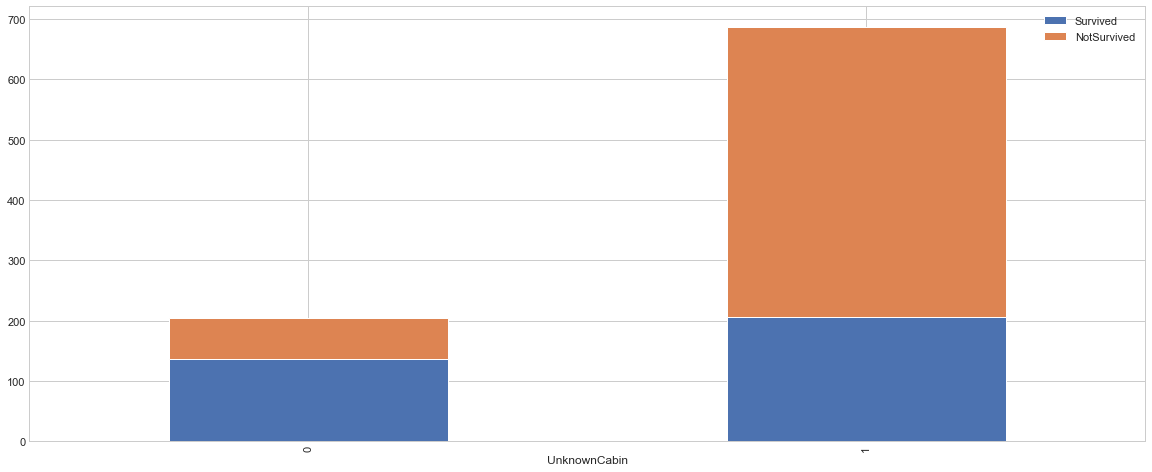

In [100]:
df_data_1['UnknownCabin']=df_data_1['Cabin'].isnull().apply(lambda x: 1 if x is True else 0)
total=df_data_1.groupby('UnknownCabin')['PassengerId'].count()
survived=df_data_1[df_data_1['Survived']==1].groupby('UnknownCabin')['PassengerId'].count()
notSurvived=df_data_1[df_data_1['Survived']==0].groupby('UnknownCabin')['PassengerId'].count()
df=pd.concat([total, survived,notSurvived], axis=1, sort=True)
df.fillna(0,inplace=True)
df.columns=['Total','Survived','NotSurvived']
df=df.astype('int64')
print(df)
df.loc[:,['Survived','NotSurvived']].plot.bar(stacked=True,figsize=(20,8))

TICKETS
It seems that tickets have prefixes - we will extract them and try to find patterns.

In [101]:
def getTicketType(name, normalise):
    item=name.split(' ')
    itemLength=len(item)
    if itemLength>1:
        ticketType=""
        for i in range(0,itemLength-1):
            ticketType+=item[i].upper()
    else:
        ticketType="NORMAL"
    if normalise==True:
        ticketType= ticketType.translate(str.maketrans('','','./'))
    return ticketType

# Let's list what we have - first view without normalising
training_itemList=[]
for ticket in df_data_5['Ticket']:
    training_itemList.append(getTicketType(ticket,False))
ticketTypeList=np.unique(training_itemList)
print("Ticket type values: no normalisation")
print(ticketTypeList)

Ticket type values: no normalisation
['A./5.' 'A.2.' 'A.5.' 'A/4' 'A/4.' 'A/5' 'A/5.' 'A/S' 'A4.' 'AQ/3.'
 'AQ/4' 'C' 'C.A.' 'C.A./SOTON' 'CA' 'CA.' 'F.C.' 'F.C.C.' 'FA' 'LP'
 'NORMAL' 'P/PP' 'PC' 'PP' 'S.C./A.4.' 'S.C./PARIS' 'S.O./P.P.' 'S.O.C.'
 'S.O.P.' 'S.P.' 'S.W./PP' 'SC' 'SC/A.3' 'SC/A4' 'SC/AH' 'SC/AHBASLE'
 'SC/PARIS' 'SCO/W' 'SO/C' 'SOTON/O.Q.' 'SOTON/O2' 'SOTON/OQ' 'STON/O2.'
 'STON/OQ.' 'SW/PP' 'W./C.' 'W.E.P.' 'W/C' 'WE/P']


Some of the tickets types are quite similar.Let's normalise them so that they are grouped.

In [102]:
training_itemList=[]
for ticket in df_data_5['Ticket']:
    training_itemList.append(getTicketType(ticket,True))
ticketTypeList=np.unique(training_itemList)
print("Ticket type values: normalisation")
print(ticketTypeList)

Ticket type values: normalisation
['A2' 'A4' 'A5' 'AQ3' 'AQ4' 'AS' 'C' 'CA' 'CASOTON' 'FA' 'FC' 'FCC' 'LP'
 'NORMAL' 'PC' 'PP' 'PPP' 'SC' 'SCA3' 'SCA4' 'SCAH' 'SCAHBASLE' 'SCOW'
 'SCPARIS' 'SOC' 'SOP' 'SOPP' 'SOTONO2' 'SOTONOQ' 'SP' 'STONO2' 'STONOQ'
 'SWPP' 'WC' 'WEP']


Now, we will explore correlation between these values and survival...

In [103]:
pd.set_option('display.max_columns', None)
df_data_5['TicketType']=df_data_5['Ticket'].apply(lambda x: getTicketType(x,True))
total=pd.DataFrame(df_data_5.groupby('TicketType')['PassengerId'].count())
total.columns=['Total']
survived=pd.DataFrame(df_data_5[df_data_5['Survived']==1].groupby('TicketType')['PassengerId'].count())
survived.columns=['Survived']
notSurvived=pd.DataFrame(df_data_5[df_data_5['Survived']==0].groupby('TicketType')['PassengerId'].count())
notSurvived.columns=['NotSurvived']

Total  Survived  NotSurvived     Ratio
TicketType                                        
A5             28         2           19  0.071429
C               8         2            3  0.250000
CA             68        14           27  0.205882
FCC             9         4            1  0.444444
NORMAL        961       255          410  0.265349
PC             92        39           21  0.423913
PP              4         2            1  0.500000
PPP             2         1            1  0.500000
SCAH            4         1            1  0.250000
SCPARIS        19         5            6  0.263158
SOC             8         1            5  0.125000
SOTONOQ        24         2           13  0.083333
STONO2         21         8           10  0.380952
WC             15         1            9  0.066667
WEP             4         1            2  0.250000

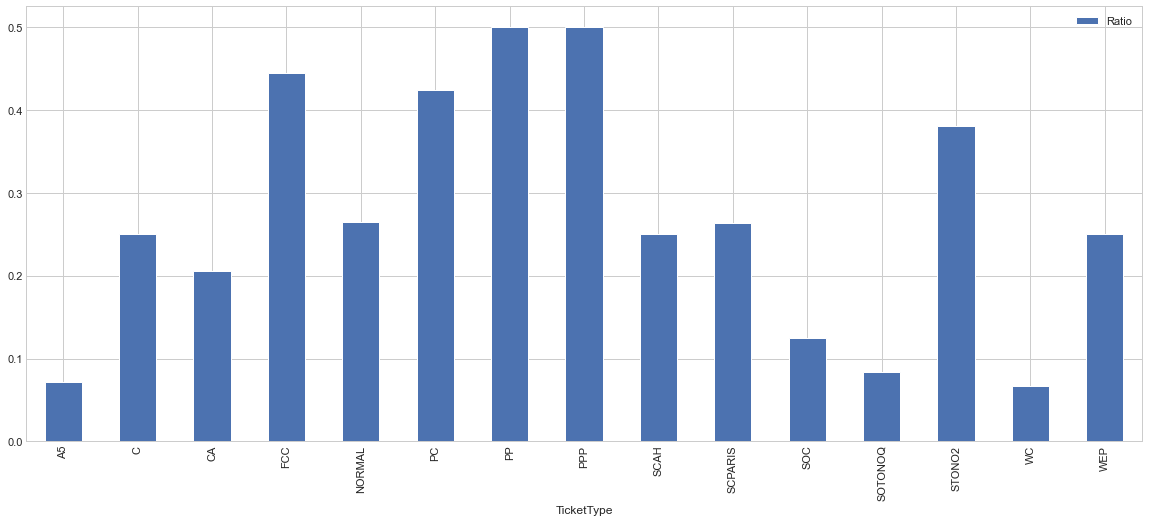

In [104]:
# Let's merge all ticket type in the same list
df_all=total
df_all=df_all.merge(survived,left_index=True, right_on="TicketType")
df_all=df_all.merge(notSurvived,left_on='TicketType', right_on="TicketType")
df_all['Ratio']=df_all['Survived']/df_all['Total']
df_all.loc[:,['Ratio']].plot.bar(figsize=(20,8))
df_all

Same concern as with the previous feature - what if this feature is highly correlated with socio-economic status?
It may be redundant and ineffective for training...
Let's explore the data directly....in particular, the ticketType with the highest ratio.

In [105]:
df_data_5[df_data_5['TicketType']=='FCC']

Age Cabin  Embarked   Fare  \
211   35.0   NaN       2.0  21.00   
314   43.0   NaN       2.0  26.25   
440   45.0   NaN       2.0  26.25   
458   50.0   NaN       2.0  10.50   
535    7.0   NaN       2.0  26.25   
956   28.0   NaN       2.0  21.00   
1137  22.0   NaN       2.0  21.00   
1240  31.0   NaN       2.0  21.00   
1242  25.0   NaN       2.0  10.50   

                                                   Name  Age Group  Parch  \
211                          Cameron, Miss. Clear Annie          2      0   
314                                  Hart, Mr. Benjamin          2      1   
440         Hart, Mrs. Benjamin (Esther Ada Bloomfield)          2      1   
458                                 Toomey, Miss. Ellen          2      0   
535                              Hart, Miss. Eva Miriam          1      2   
956   Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...          2      0   
1137              Karnes, Mrs. J Frank (Claire Bennett)          2      0   
1240                             Walcroft, Miss. Nellie          2      0   
1242                          Stokes, Mr. Philip Joseph          2      0   

      PassengerId  Pclass  Sex  SibSp  Survived        Ticket  UnknownCabin  \
211           212       2    1      0       1.0  F.C.C. 13528           1.0   
314           315       2    0      1       0.0  F.C.C. 13529           1.0   
440           441       2    1      1       1.0  F.C.C. 13529           1.0   
458           459       2    1      0       1.0  F.C.C. 13531           1.0   
535           536       2    1      0       1.0  F.C.C. 13529           1.0   
956           957       2    1      0       NaN  F.C.C. 13534           NaN   
1137         1138       2    1      0       NaN  F.C.C. 13534           NaN   
1240         1241       2    1      0       NaN  F.C.C. 13528           NaN   
1242         1243       2    0      0       NaN  F.C.C. 13540           NaN   

      FamilySize  IsAlone   Surname Title  IsChild  GroupID  GroupSize  \
211            1        1   Cameron  Miss        0      782          2   
314            3        0      Hart    Mr        0      783          3   
440            3        0      Hart   Mrs        0      783          3   
458            1        1    Toomey  Miss        0      784          1   
535            3        0      Hart  Miss        1      783          3   
956            1        1     Corey   Mrs        0      785          2   
1137           1        1    Karnes   Mrs        0      785          2   
1240           1        1  Walcroft  Miss        0      782          2   
1242           1        1    Stokes    Mr        0      786          1   

      GroupType  GroupNumSurvived  GroupNumPerished  SplitFare  log10Fare  \
211   NonFamily                 1                 0      10.50   1.342423   
314      Family                 2                 1       8.75   1.435367   
440      Family                 2                 1       8.75   1.435367   
458     IsAlone                 1                 0      10.50   1.060698   
535      Family                 2                 1       8.75   1.435367   
956   NonFamily                 0                 0      10.50   1.342423   
1137  NonFamily                 0                 0      10.50   1.342423   
1240  NonFamily                 1                 0      10.50   1.342423   
1242    IsAlone                 0                 0      10.50   1.060698   

      log10SplitFare         FareBin    SplitFareBin CabinDeck TicketType  
211         1.060698  (1.084, 1.355]  (1.055, 1.267]         G        FCC  
314         0.989005  (1.355, 1.626]  (0.844, 1.055]         G        FCC  
440         0.989005  (1.355, 1.626]  (0.844, 1.055]         G        FCC  
458         1.060698  (0.813, 1.084]  (1.055, 1.267]         F        FCC  
535         0.989005  (1.355, 1.626]  (0.844, 1.055]         G        FCC  
956         1.060698  (1.084, 1.355]  (1.055, 1.267]         G        FCC  
1137        1.060698  (1.084, 

Interesting! It seems that  three of the members belong to the same family...  
Let's take note for the next rounds of exploration...

In [106]:
df_data_5[df_data_5['TicketType']=='PC']

Age            Cabin  Embarked      Fare  \
1     38.0              C85       0.0   71.2833   
30    40.0              NaN       0.0   27.7208   
31    36.0              B78       0.0  146.5208   
34    28.0              NaN       0.0   82.1708   
52    49.0              D33       0.0   76.7292   
64    42.0              NaN       0.0   27.7208   
96    71.0               A5       0.0   34.6542   
97    23.0          D10 D12       0.0   63.3583   
118   24.0          B58 B60       0.0  247.5208   
139   24.0              B86       0.0   79.2000   
155   51.0              NaN       0.0   61.3792   
168   42.0              NaN       2.0   25.9250   
177   50.0              C49       0.0   28.7125   
194   44.0               B4       0.0   27.7208   
195   58.0              B80       0.0  146.5208   
256   36.0              NaN       0.0   79.2000   
258   35.0              NaN       0.0  512.3292   
268   58.0             C125       2.0  153.4625   
269   35.0              C99       2.0  135.6333   
273   37.0             C118       0.0   29.7000   
295   42.0              NaN       0.0   27.7208   
299   50.0          B58 B60       0.0  247.5208   
307   17.0              C65       0.0  108.9000   
309   30.0              E36       0.0   56.9292   
311   18.0  B57 B59 B63 B66       0.0  262.3750   
325   36.0              C32       0.0  135.6333   
332   38.0              C91       2.0  153.4625   
334   36.0              NaN       2.0  133.6500   
369   24.0              B35       0.0   69.3000   
373   22.0              NaN       0.0  135.6333   
375   36.0              NaN       0.0   82.1708   
380   42.0              NaN       0.0  227.5250   
493   71.0              NaN       0.0   49.5042   
505   18.0              C65       0.0  108.9000   
512   36.0              E25       2.0   26.2875   
513   54.0              NaN       0.0   59.4000   
527   42.0              C95       2.0  221.7792   
537   30.0              NaN       0.0  106.4250   
544   50.0              C86       0.0  106.4250   
557   42.0              NaN       0.0  227.5250   
572   36.0              E25       2.0   26.3875   
599   49.0              A20       0.0   56.9292   
609   40.0             C125       2.0  153.4625   
641   24.0              B35       0.0   69.3000   
645   48.0              D33       0.0   76.7292   
660   50.0              NaN       2.0  133.6500   
679   36.0      B51 B53 B55       0.0  512.3292   
681   27.0              D49       0.0   76.7292   
700   18.0          C62 C64       0.0  227.5250   
701   35.0              E24       2.0   26.2875   
707   42.0              E24       2.0   26.2875   
710   24.0              C90       0.0   49.5042   
716   38.0              C45       0.0  227.5250   
737   35.0             B101       0.0  512.3292   
742   21.0  B57 B59 B63 B66       0.0  262.3750   
789   46.0          B82 B84       0.0   79.2000   
793   42.0              NaN       0.0   30.6958   
835   39.0              E49       0.0   83.1583   
853   16.0              D28       2.0   39.4000   
867   31.0              A24       2.0   50.4958   
911   55.0              NaN       0.0   59.4000   
913   36.0              NaN       2.0   31.6833   
914   21.0              NaN       0.0   61.3792   
915   48.0  B57 B59 B63 B66       0.0  262.3750   
937   45.0               A9       0.0   29.7000   
950   36.0              B61       0.0  262.3750   
955   13.0  B57 B59 B63 B66       0.0  262.3750   
964   28.5              D43       0.0   27.7208   
972   67.0          C55 C57       2.0  221.7792   
1003  36.0              A29       0.0   31.6792   
1005  63.0          C55 C57       2.0  221.7792   
1033  61.0  B57 B59 B63 B66       0.0  262.3750   
1047  29.0              C97       2.0  221.7792   
1057  48.0              B10       0.0   50.4958   
1070  64.0              E45       0.0   83.1583   
1072  37.0              E52       0.0   83.1583   
1075  27.0          B58 B60       0.0  247.5208   
1093  47.0          C62 C64  

In [107]:
len(df_data_5[df_data_5['TicketType']=='PC'])

92

In [108]:
df_data_5[df_data_5['TicketType']=='PP']

Age Cabin  Embarked   Fare  \
10     4.0    G6       2.0  16.70   
225   22.0   NaN       2.0   9.35   
394   24.0    G6       2.0  16.70   
1008   1.0    G6       2.0  16.70   

                                                   Name  Age Group  Parch  \
10                      Sandstrom, Miss. Marguerite Rut          1      1   
225                        Berglund, Mr. Karl Ivar Sven          2      0   
394   Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...          2      2   
1008                    Sandstrom, Miss. Beatrice Irene          0      1   

      PassengerId  Pclass  Sex  SibSp  Survived   Ticket  UnknownCabin  \
10             11       3    1      1       1.0  PP 9549           0.0   
225           226       3    0      0       0.0  PP 4348           1.0   
394           395       3    1      0       1.0  PP 9549           0.0   
1008         1009       3    1      1       NaN  PP 9549           NaN   

      FamilySize  IsAlone    Surname Title  IsChild  GroupID  GroupSize  \
10             3        0  Sandstrom  Miss        1      840          3   
225            1        1   Berglund    Mr        0      839          1   
394            3        0  Sandstrom   Mrs        0      840          3   
1008           3        0  Sandstrom  Miss        1      840          3   

     GroupType  GroupNumSurvived  GroupNumPerished  SplitFare  log10Fare  \
10      Family                 2                 0   5.566667   1.247973   
225    IsAlone                 0                 1   9.350000   1.014940   
394     Family                 2                 0   5.566667   1.247973   
1008    Family                 2                 0   5.566667   1.247973   

      log10SplitFare         FareBin    SplitFareBin CabinDeck TicketType  
10          0.817345  (1.084, 1.355]  (0.633, 0.844]         G         PP  
225         1.014940  (0.813, 1.084]  (0.844, 1.055]         E         PP  
394         0.817345  (1.084, 1.355]  (0.633, 0.844]         G         PP  
1008        0.817345  (1.084, 1.355]  (0.633, 0.844]         G         PP

20 Correlation without NaNs
---

<AxesSubplot:>

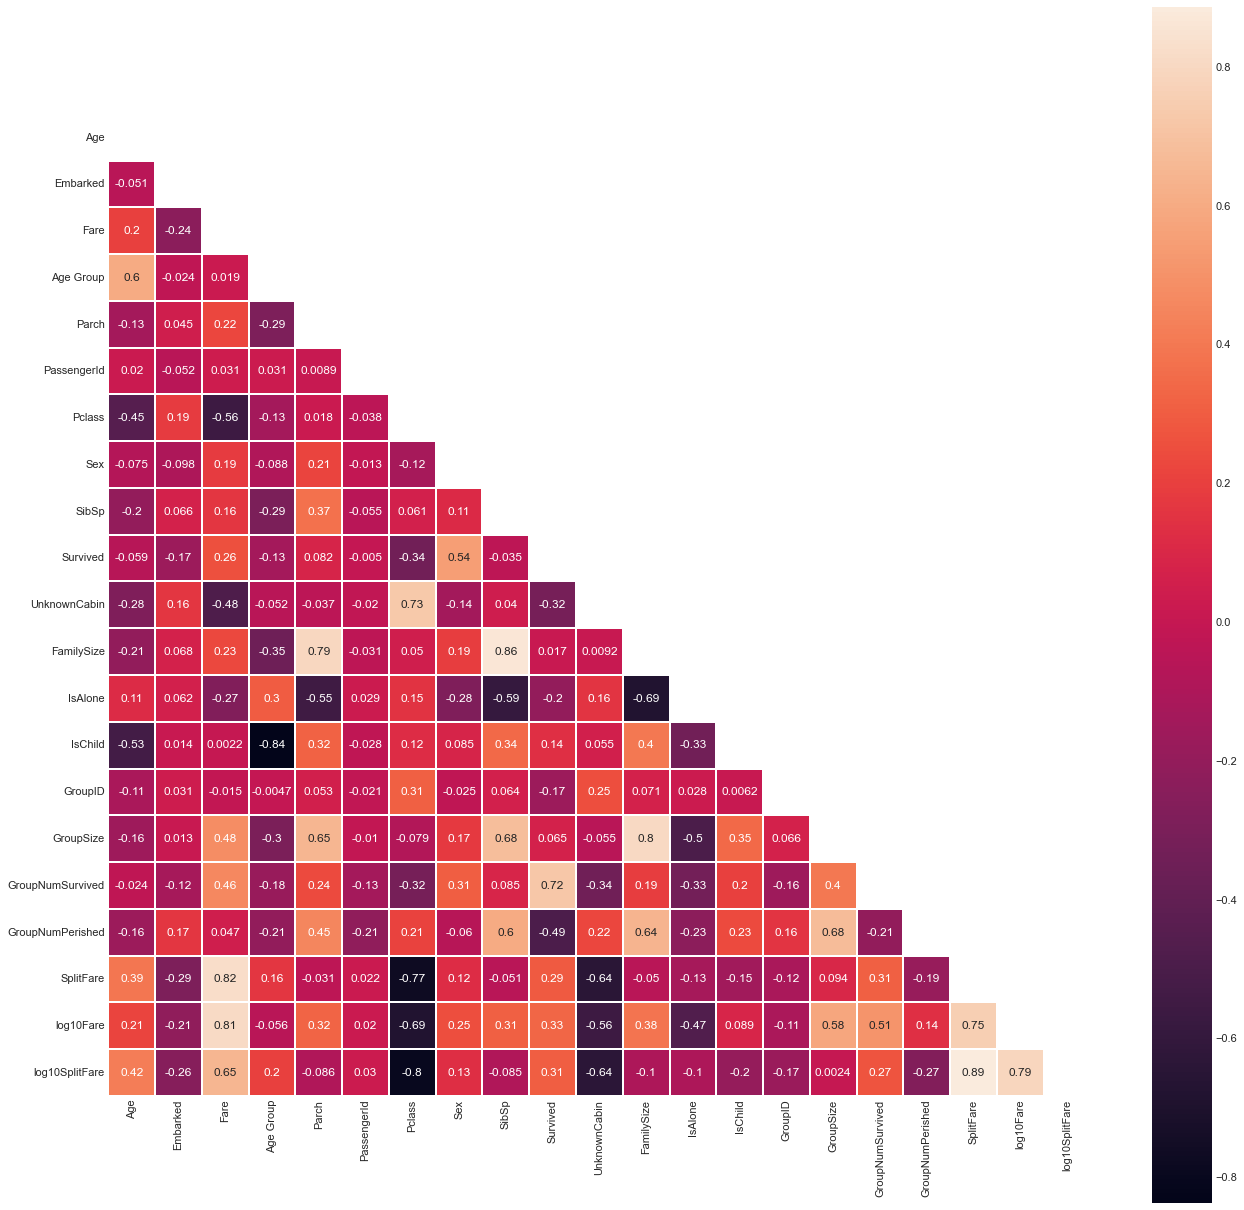

In [109]:
df_heatmap = pd.DataFrame(df_data_5.corr(method='pearson'))
mask=np.zeros_like(df_heatmap)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(22,22),facecolor='white')
sns.color_palette("rocket", as_cmap=True)  
sns.heatmap(df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket',mask=mask)

In [110]:
t0 = time()
X_train = 
n_components = 4
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

SyntaxError: invalid syntax (Temp/ipykernel_15168/2931104444.py, line 2)

20 One Hot Encoding
---

To finish with, we are going to one hot encoded non-ordinal features. Those features are Embarked, Sex, Deck, Title and PClass.

In [ ]:
df_data_6=df_data_5.copy()

In [ ]:
df_data_6.info()

Le feature 'GroupSize' 'Age Group' oltre ad essere categoriche sono anche ordinali. Il numero progressivo associato ad una categoria ha anche un senso logico quindi può avere senso non dover applicare il OneHotEncoding.

In [ ]:
#Versione 1: 'GroupSize' 'Age Group' comprese nel OneHotEncoding
#categorical_cols = ['Pclass', 'Sex', 'Age Group', 'CabinDeck', 'Embarked', 'Title', 'GroupSize' , 'TicketType']
#Versione 2: 'GroupSize' 'Age Group' non comprese nel OneHotEncoding
categorical_cols = ['Pclass', 'Sex' , 'CabinDeck', 'Embarked', 'Title', 'TicketType']
drop_cols = ['Age' , 'SibSp' , 'Parch' , 'Cabin' , 'Embarked' , 'Name' , 'Ticket', 'UnknownCabin', 'FamilySize','IsAlone', 'Surname',
            'Title', 'GroupID','GroupType','GroupNumSurvived','GroupNumPerished','log10Fare','log10SplitFare',
            'FareBin','SplitFareBin','Pclass', 'Sex', 'Age Group', 'CabinDeck', 'Embarked', 'Title', 'GroupSize' , 'TicketType']

#ONE HOT ENCODING WITH OneHotEncoder

labeled_df = df_data_6[categorical_cols]
enc = preprocessing.OneHotEncoder()
enc.fit(labeled_df)

onehotlabels = enc.transform(labeled_df).toarray()

new_columns=list()
for col, values in zip(labeled_df.columns, enc.categories_):
    new_columns.extend([col + '_' + str(value) for value in values])

df_data_8= pd.concat([df_data_6, pd.DataFrame(onehotlabels, columns=new_columns)], axis='columns')
df_data_8

In [ ]:
#ONE HOT ENCODING WITH getdummies
#To generate hot encoded column names with ascending index :
    #n = df_data_6[fname].nunique()
    #['{}_{}'.format(fname, n) for n in range(1, n + 1)]
df_data_7=df_data_6.copy()
for fname in categorical_cols: 
    dummy_gender = pd.get_dummies(df_data_7[fname], prefix='{}_'.format(fname))
    df_data_7= pd.concat([df_data_7,dummy_gender], axis='columns')
#df_data_7 = pd.merge(
#    left=df_data_6,
#    right=dummy_gender,
#    left_index=True,
#    right_index=True,
#)
df_data_7 

In [ ]:
df_data_7.drop(columns=drop_cols, inplace=True)

In [ ]:
df_data_7.info()

df_data_8.drop(columns=drop_cols, inplace=True)

df_data_8.info()

20 Normalization
---

In [ ]:
cMMS=preprocessing.MinMaxScaler()
x = df_data_7['SplitFare'].values.reshape(-1, 1)
x_scaled = cMMS.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled , columns =["SplitFareNorm"]) 
df_data_9= pd.concat([df_data_7, df_scaled ], axis='columns')

In [ ]:
df_data_9

Modeling
---

In [ ]:
x_train = df_data_9[df_data_9.Survived.isnull() == False].drop('Survived',axis=1)
y_train = df_data_9[df_data_9.Survived.isnull() == False].Survived

Crossvalidation

For the modeling part we will compare 10 known algorithms, and proceed to evaluate their average accuracy by a stratified kfold cross validation procedure:

SVC
Decision Tree
AdaBoost
Random Forest
Extra Trees
Gradient Boosting
Multiple layer perceprton (neural network)
KNN
Logistic regression
Linear Discriminant Analysis
XGBoost Classifier
To begin with, we are going to create a cross validate model with Kfold stratified. Then we'll test each of the algorithms that I have mentioned before.

In [ ]:
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LinearDiscriminantAnalysis",'XGBClassifier']})
cv_res = cv_res.sort_values(by='CrossValMeans',ascending = False)

In [ ]:
fig = make_subplots(rows=1, cols=1, 
                    specs=[[{"type": "bar"}]])

fig.add_trace(go.Bar(x=cv_res['CrossValMeans'], y=cv_res.Algorithm, marker=dict(color=['#334550','#334550','#334668','#334668','#496595','#496595','#6D83AA','#6D83AA','#91A2BF','#C8D0DF']),
                     name='Fare', orientation='h'), 
                     row=1, col=1)
# styling
fig.update_yaxes(showgrid=True, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=True, row=1, col=1)
fig.update_layout(height=500, bargap=0.1,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Cross Validation Scores",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [117]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
e=x[:, np.newaxis]

In [118]:
e

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00],
       [9.23385948e-01],
       [1.86260211e+00],
       [3.45560727e+00],
       [3.96767474e+00],
       [5.38816734e+00],
       [4.19194514e+00],
       [6.85219500e+00],
       [2.04452250e+00],
       [8.78117436e+00],
       [2.73875932e-01],
       [6.70467510e+00],
       [4.17304802e+00],
       [5.58689828e+00],
       [1.40386939e+00],
       [1.98101489e+00],
       [8.00744569e+00],
       [9.68261576e+00],
       [3.13424178e+00],
       [6.92322616e+00],
       [8.76389152e+00],
       [8.94606664e+00],
       [8.50442114e-01],
       [3.90547832e-01],
       [1.69830420e+00],
       [8.78142503e+00],
       [9.83468338e-01],
       [4.21107625e+00],
       [9.57889530e+00],
       [5.33165285e+00],
       [6.91877114e+00],
       [3.15515631e+00],
       [6.86500928e+00],
       [8.34625672e+00],
       [1.82882773e-01],
       [7.50144315e+00],


In [119]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])